# Unsupervised Learning: Trade&Ahead

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
#Importing basic essential libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing library to scale the data.
from sklearn.preprocessing import StandardScaler

#Importing library of distance measuments.
from scipy.spatial.distance import cdist, pdist

#Importing clustering algorithm and visualization libraries.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

#Import warnings.
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Importing the data.

from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['stock_data.csv']))

Saving stock_data.csv to stock_data.csv


## Data Overview

- Observations
- Sanity checks

In [ ]:
#Checking the shape of the data set.

print("There are", data.shape[0], "rows and", data.shape[1], "columns in this data set.")

There are 340 rows and 15 columns in this data set.


In [ ]:
#Checking the first 5 rows of the data set.

data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
#Checking the last 5 rows of the data set.

data.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [ ]:
#Checking the number of columns and their data types.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

There appear to be no missing values in any of the columns. Most columns are numerical, with exception of the first four.

In [ ]:
#Double-checking for missing values.

data.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

There are no missing/NaN values.

In [ ]:
#Checking for duplicate values.

data.duplicated().sum()

0

There are no duplicate values.

In [ ]:
#Checking the statistical summary of all the columns.

data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


Besides the statistical summary of the numeric columns, we can see that the GICS Sector has only 11 unique values, and the GICS Sub Industry has 104.

In [ ]:
#Creating a copy of the data set, in case any changes need to be made for analysis.

df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Visualization Functions

In [ ]:
#Defining a fucntion to create labeled countplots.

def labeledCountplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top:

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])                #Length of the column
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize = (count + 2, 8))
    else:
        plt.figure(figsize = (n + 2, 8))

    plt.xticks(rotation = 90)
    ax = sns.countplot(
        data = df,
        x = feature,
        palette = "hls",
        order = data[feature].value_counts().index[:n],
    )
    plt.ylabel("Count")

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total  #Percentage of each class of the category
            )
        else:
            label = int(p.get_height())       #Count of each level of the category

        x = p.get_x() + p.get_width() / 2     #Width of the plot
        y = p.get_height()                    #Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0,5),
            textcoords = "offset points",
        )                                     #Annotate the percentage

    plt.show()

In [ ]:
#Defining a function to create a boxplot and histogram together.

def histoBoxplot(data, feature, figsize = (15, 10), kde = True, bins = None):
    """
    Boxplot and Histogram combined:

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    #Creating the 2 subplots.
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,                       #Number of rows of the subplot grid
        sharex = True,                   #X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )

    #Creating the boxplot that also indicates the mean.
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "tomato")

    #Creating the histogram.
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, color = "tomato"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, color = "tomato"
    )

    #Adding mean to the histogram.
    ax_hist2.axvline(data[feature].mean(), color = "red", linestyle = "--")

    #Adding median to the histogram.
    ax_hist2.axvline(data[feature].median(), color = "maroon", linestyle = "-")

### Univariate Analysis

In [ ]:
#Confirming the number of unique values of the Ticker Symbol column (from the statistical summary).

print("There are", df["Ticker Symbol"].nunique(), "unique values in the 'Ticker Symbol' column.")

There are 340 unique values in the 'Ticker Symbol' column.


This is a data point identification column, so there is no need to visualize.

In [ ]:
#Confirming the number of unique values of the Security column (from the statistical summary).

print("There are", df["Security"].nunique(), "unique values in the 'Security' column.")

There are 340 unique values in the 'Security' column.


This is a data point identification column, so there is no need to visualize.

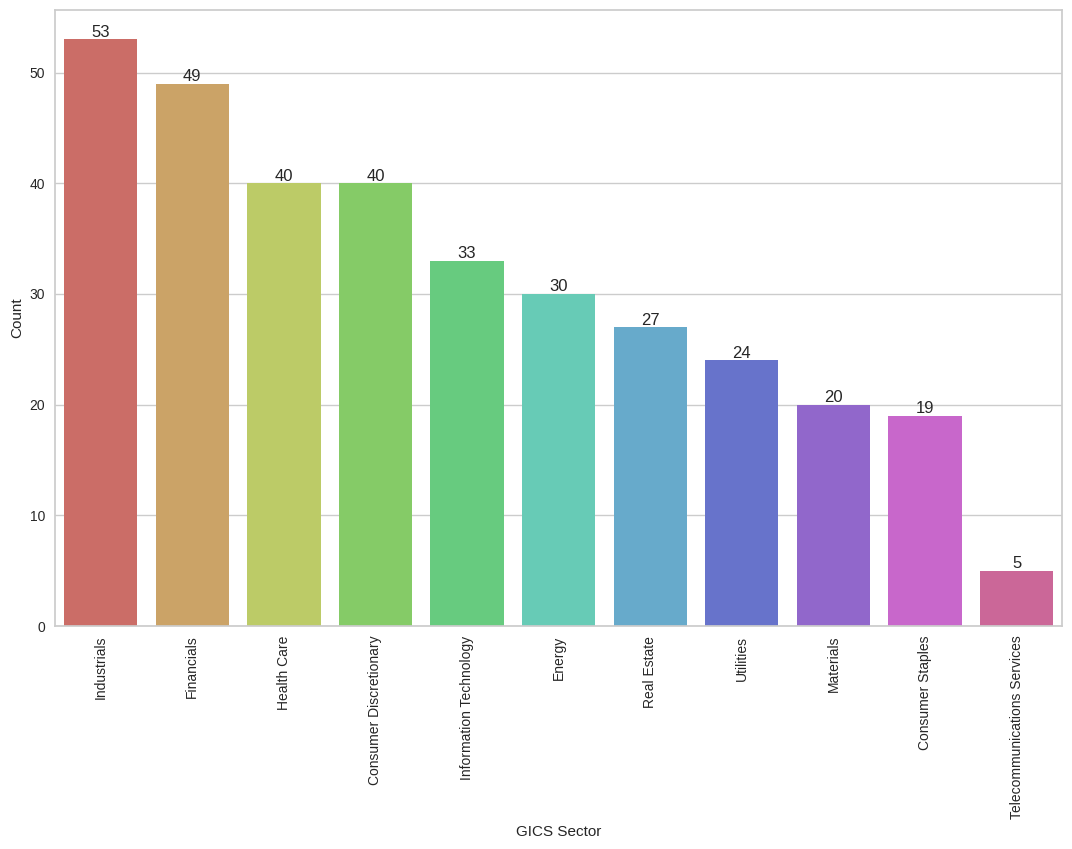

In [ ]:
#Creating a labeled countplot for the GICS Sector column.

labeledCountplot(df, "GICS Sector")

There are 11 economic sector categories. The Industrials sector has the most companies that fall under it, while the Telecommunications Services sector has the least.

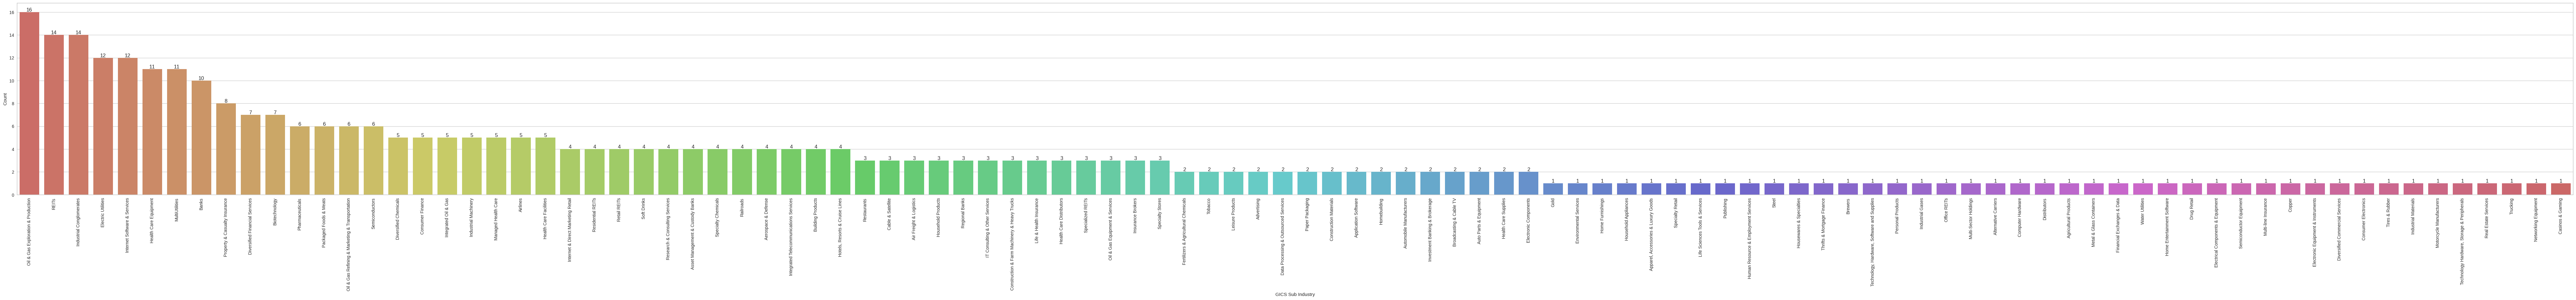

In [ ]:
#Creating a labeled countplot for the GICS Sub Industry column.

labeledCountplot(df, "GICS Sub Industry")

There are 104 sub-industry groups. Though this column can be visualized, it is difficult to read or use the graph. However, from the statistical summary, we can see that the "Oil & Gas Exploration & Production" group has the most companies that fall under it with (16).

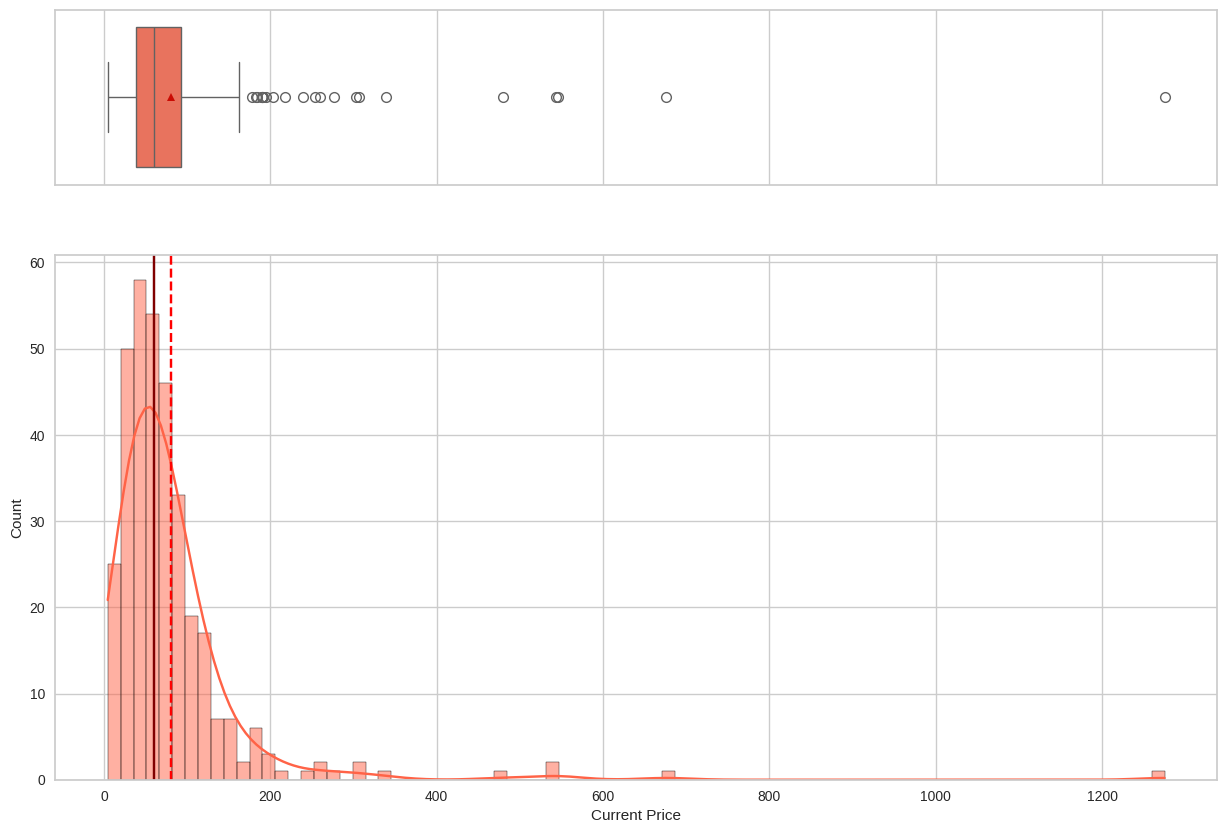

In [ ]:
# "What does the distribution of stock prices look like?"
#Creating a histogram & boxplot for the Current Price column.

histoBoxplot(df, "Current Price")

The distribution is highly right-skewed; there are many unusually high stock prices (normal for the market). This makes the mean stock price greater than the median.

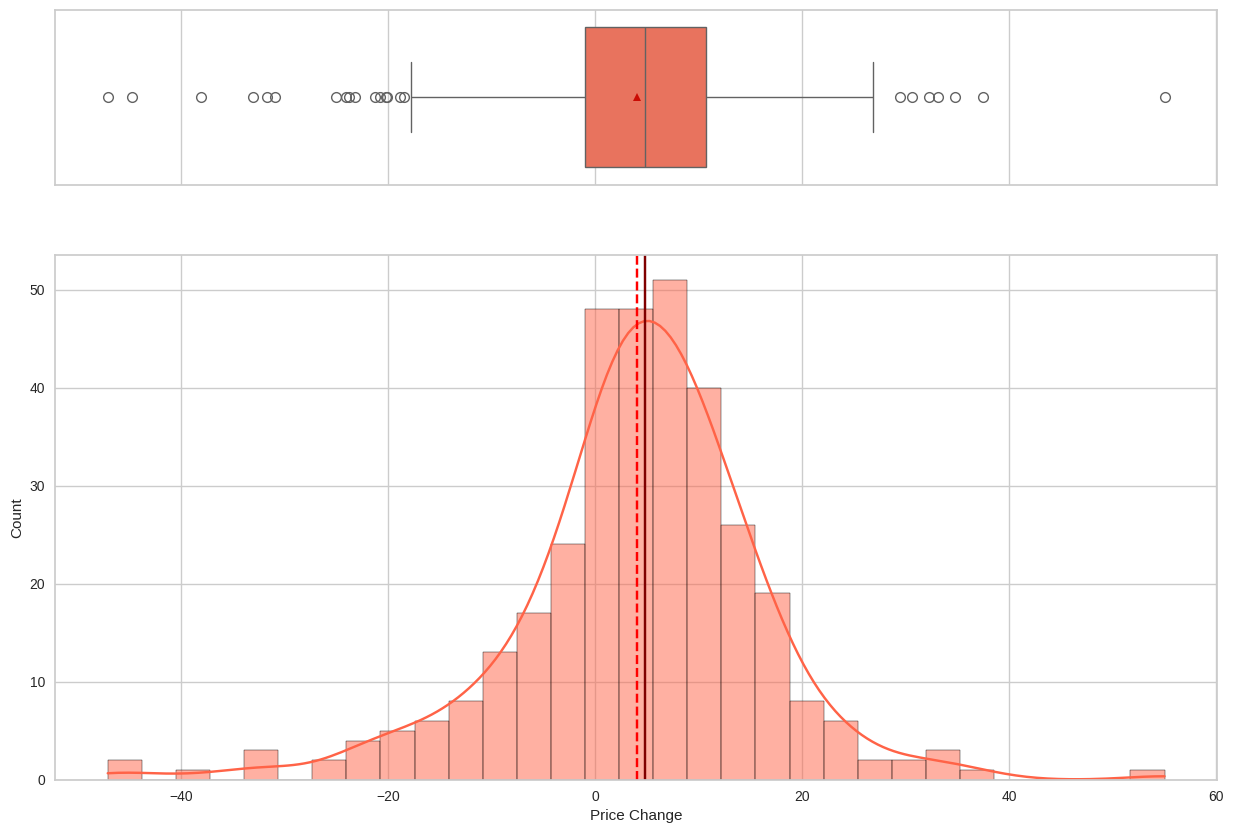

In [ ]:
#Creating a histogram & boxplot for the Price Change column.

histoBoxplot(df, "Price Change")

The distribution appears normal based on the KDE curve, but has outliers on both extremes. This makes sense, as stock prices can both go up or down (positive and negative change), as well as drastically change in value.

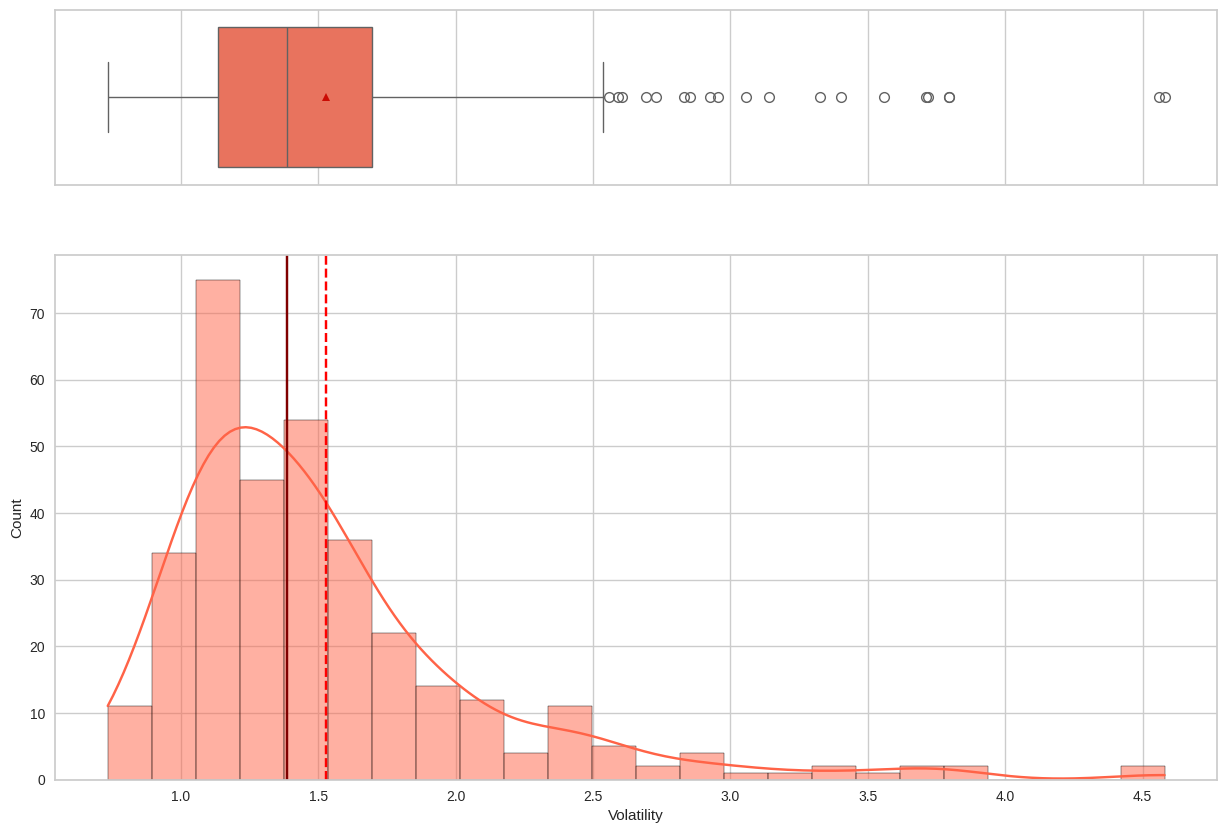

In [ ]:
#Creating a histogram & boxplot for the Volatility column.

histoBoxplot(df, "Volatility")

The distribution is highly right-skewed. Stock prices can either change or NOT change (and most do, some very drastically), so the extreme outliers make sense.

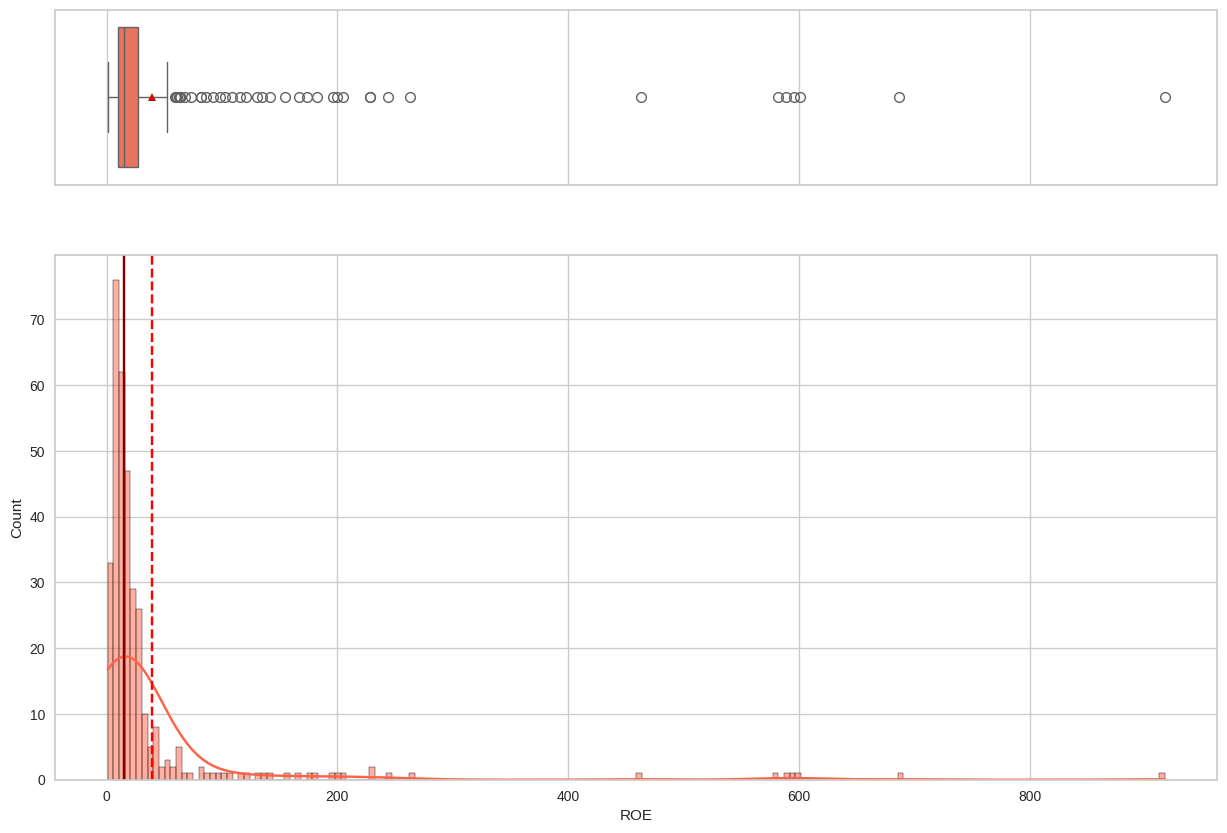

In [ ]:
#Creating a histogram & boxplot for the ROE column.

histoBoxplot(df, "ROE")

The distribution is extremely right-skewed. ROE essentially measures profitabilty, so it makes sense to have far-right outliers (likely those same stocks with very high prices). ROE can also be negative, but it looks like none of the listed companies reported a loss.

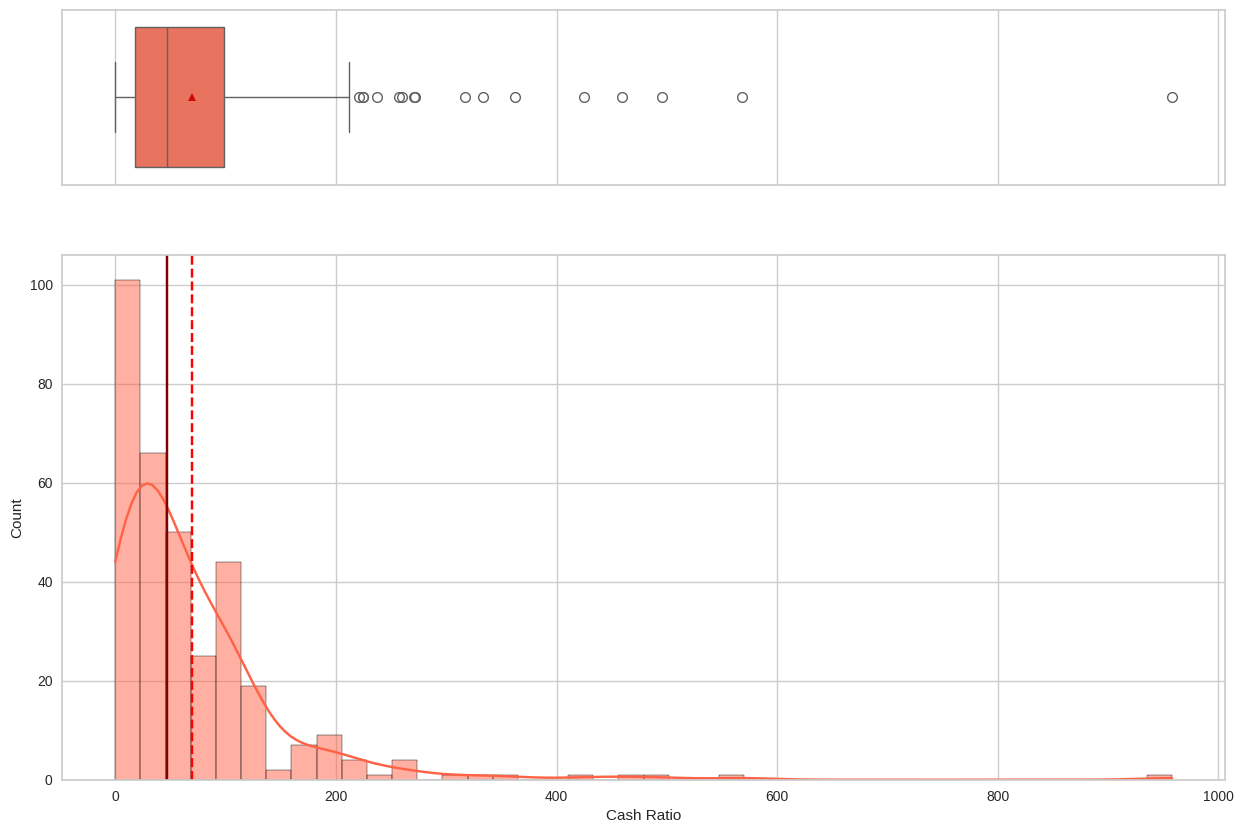

In [ ]:
#Creating a histogram & boxplot for the Cash Ratio column.

histoBoxplot(df, "Cash Ratio")

The distribution is highly right-skewed. The cash ratio measures liquidity of a company, so a good number would be above 1. Thus, it makes sense for there to be such high outliers (the companies with a lot of cash and minimum liabilities).

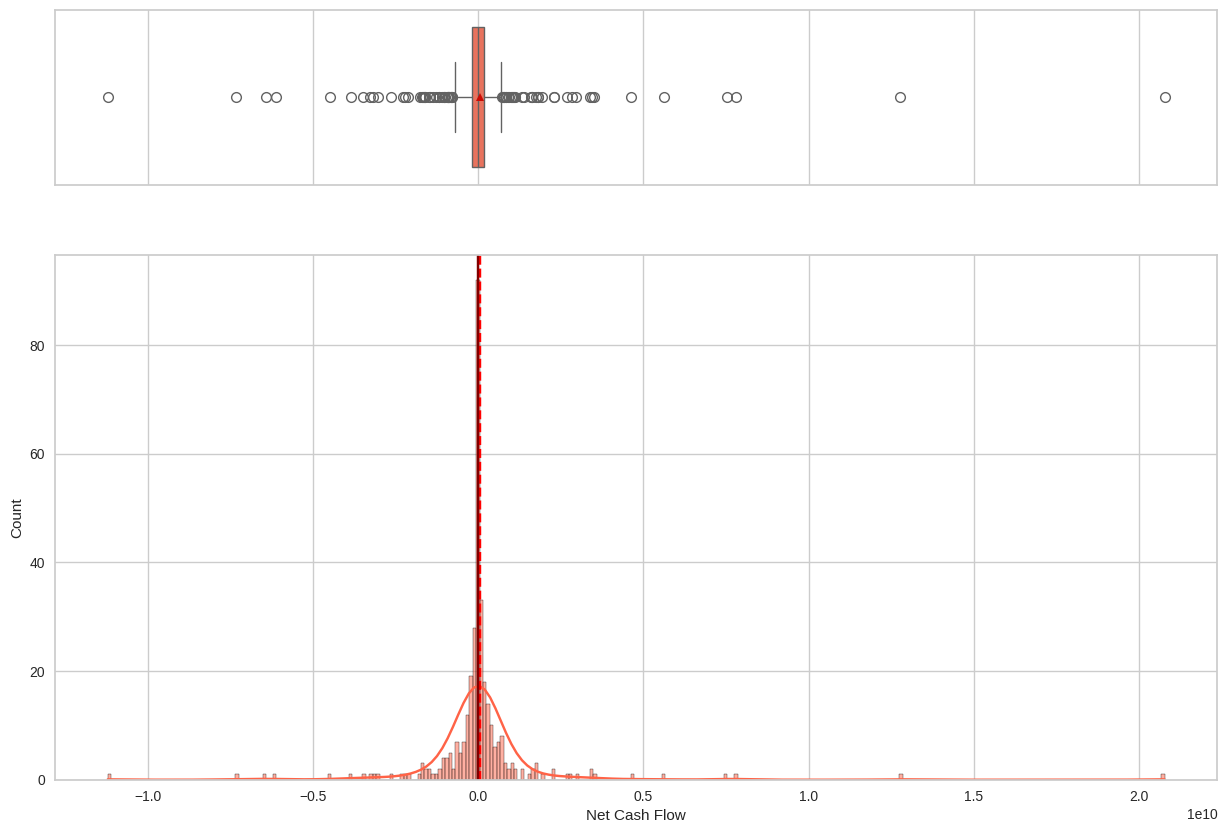

In [ ]:
#Creating a histogram & boxplot for the Net Cash Flow column.

histoBoxplot(df, "Net Cash Flow")

The distribution appears to be normal. Since the data points are the actual whole numbers (which can be hard to display), and there is great variance across the values, the graph displays them as multiples of 1e10. Hypothetically, a company can have a huge negative (or positive) flow of cash, so these numbers make sense.

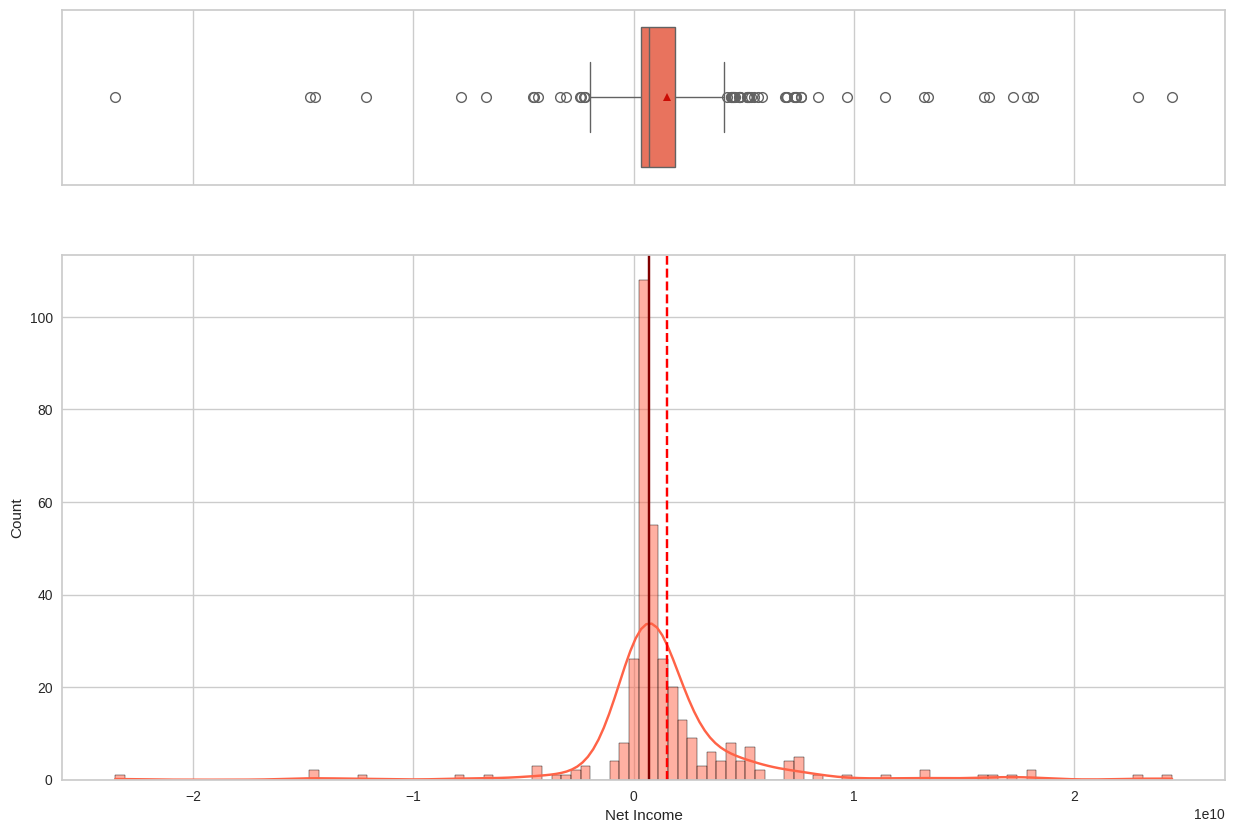

In [ ]:
#Creating a histogram & boxplot for the Net Income column.

histoBoxplot(df, "Net Income")

The distribution is more right-skewed. Again, since the data points are the actual whole numbers (which can be hard to display), and there is great variance across the values, the graph displays them as multiples of 1e10. These numbers also make sense, since a company can have less revenue than expenses.

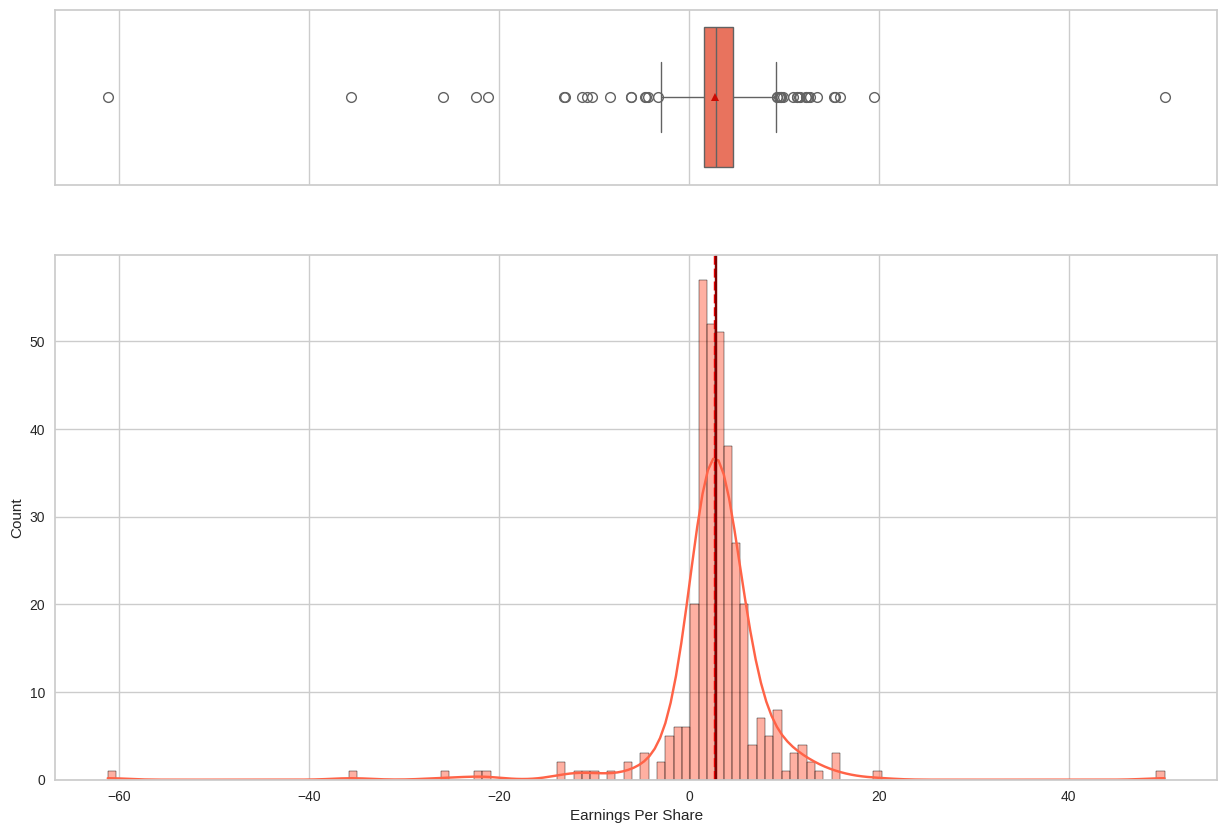

In [ ]:
#Creating a histogram & boxplot for the Earnings Per Share column.

histoBoxplot(df, "Earnings Per Share")

The distribution is more left-skewed. Net profit can be both positive and negative, so the outliers make sense.

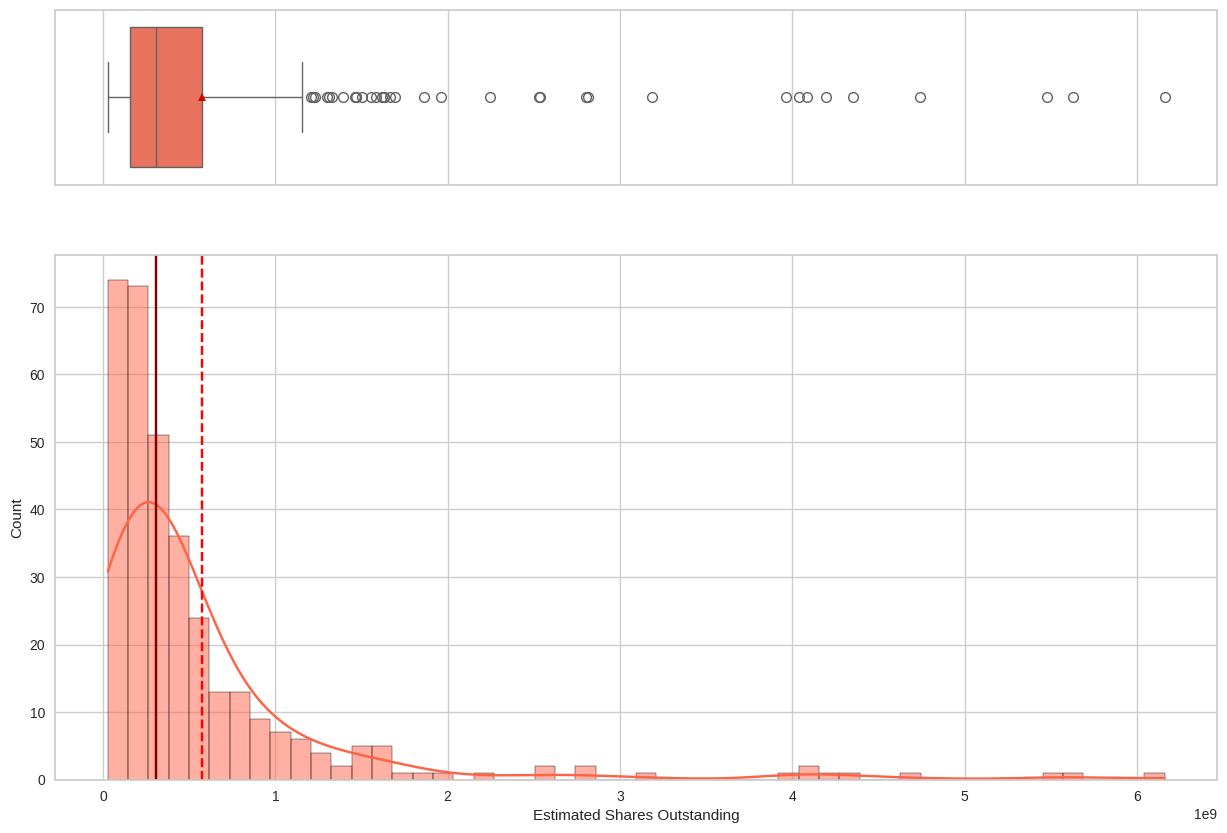

In [ ]:
#Creating a histogram & boxplot for the Estimated Shares Outstanding column.

histoBoxplot(df, "Estimated Shares Outstanding")

The distribution is highly right-skewed. A company can have 0 shares all the way to billions; the largest companies have the most shares, so these numbers make sense.

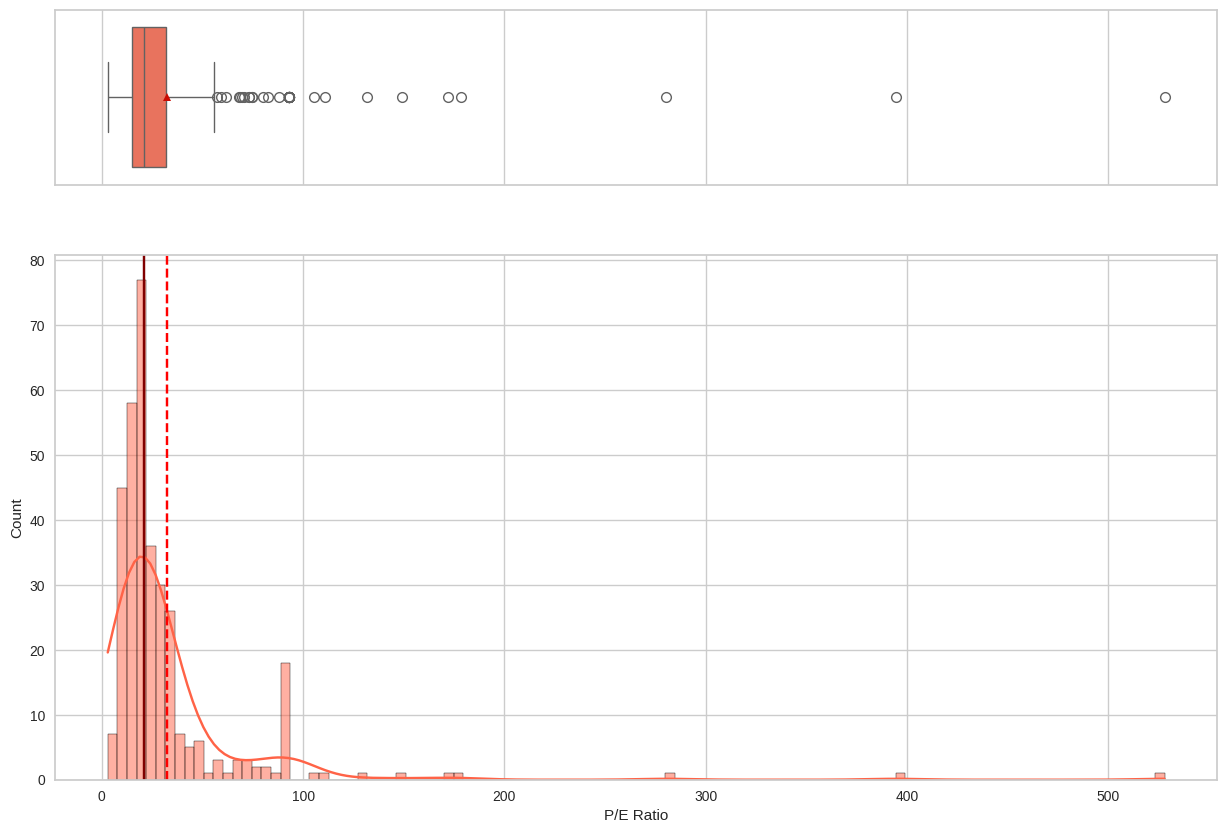

In [ ]:
#Creating a histogram & boxplot for the P/E Ratio column.

histoBoxplot(df, "P/E Ratio")

The distribution appears bimodal, as it has one large peak and another small but notable second peak. It is also right-skewed. Some stocks can cost way more than the profit they bring in, so the outliers make sense.

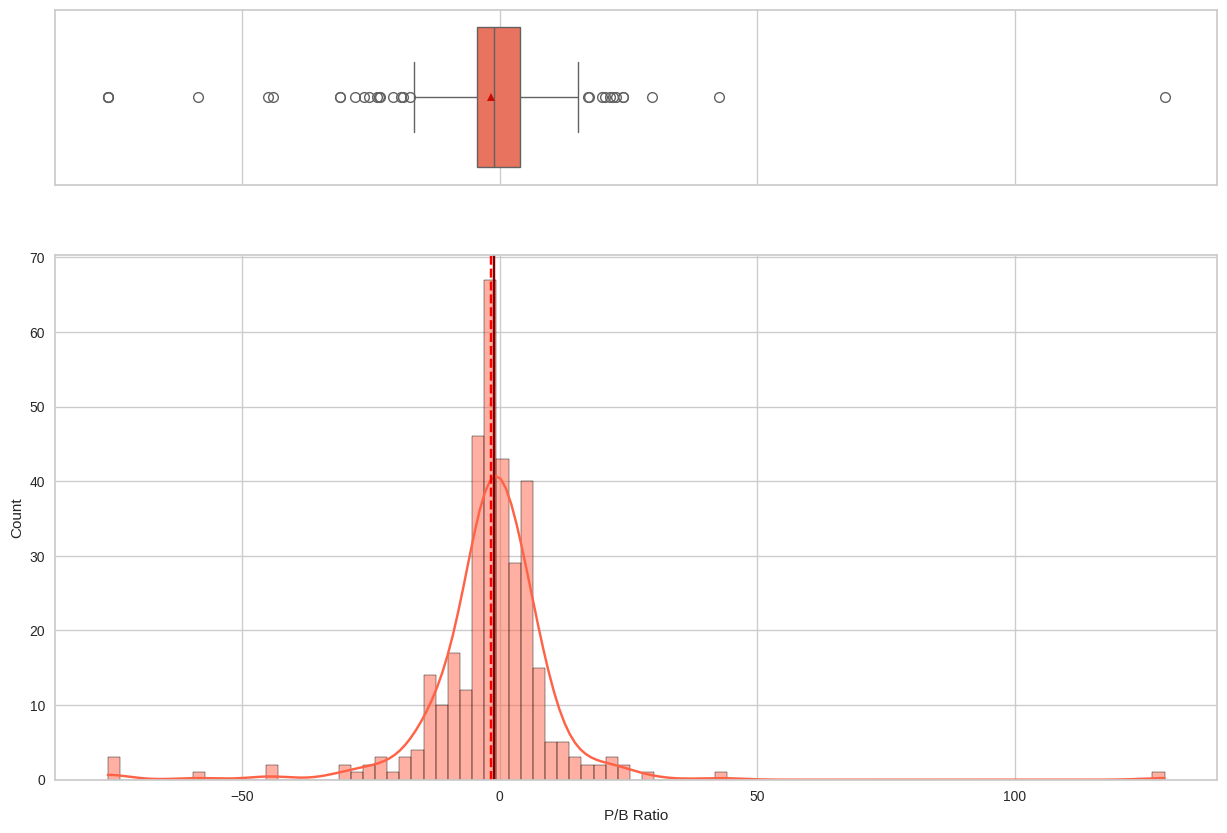

In [ ]:
#Creating a histogram & boxplot for the P/B Ratio column.

histoBoxplot(df, "P/B Ratio")

The distribution is more right-skewed. A company can have more liabilities than assets (resulting in a negative P/B Ratio), so the outliers on both extremes make sense.

### Bivariate Analysis

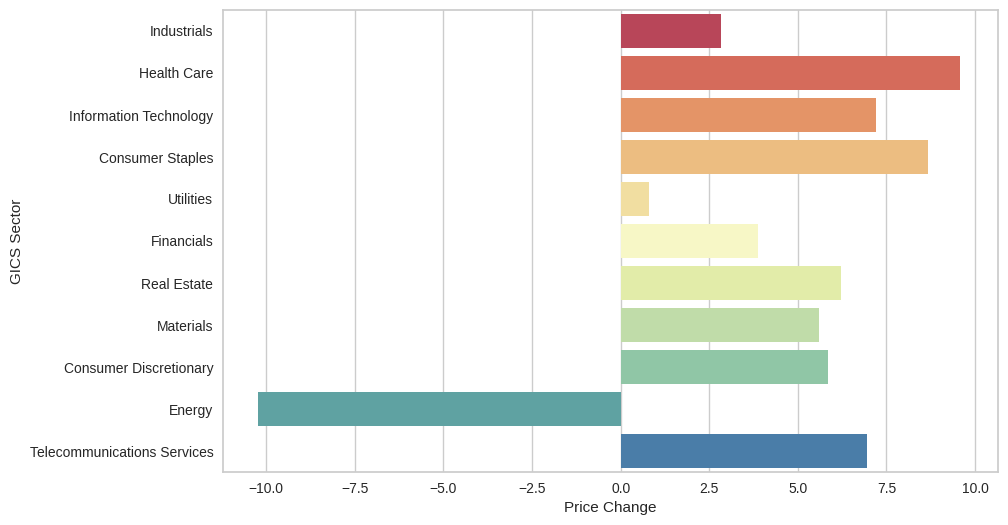

In [ ]:
# "The stocks of which economic sector have seen the maximum price increase on average?"
#Creating a barplot for GICS Sector vs. Price Change.

plt.figure(figsize = (10,6))
sns.barplot(data = df, x = "Price Change", y = "GICS Sector", palette = "Spectral", ci = False)
plt.show()

The Health Care sector had the greatest price increase over the last 13 weeks. Conversely, the Energy sector had the greatest price decrease.

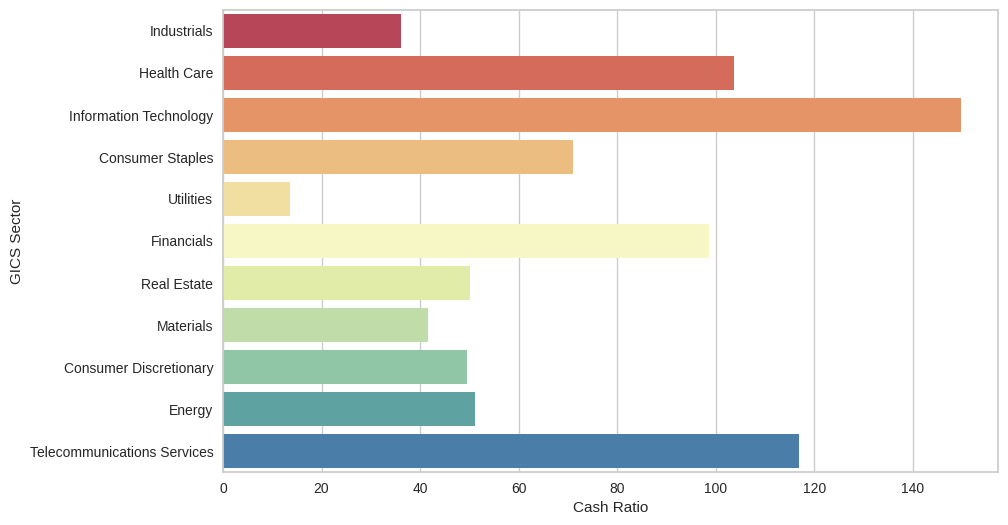

In [ ]:
'''Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents.
How does the average cash ratio vary across economic sectors?'''
#Creating a barplot for GICS Sector vs. Cash Ratio.

plt.figure(figsize = (10,6))
sns.barplot(data = df, x = "Cash Ratio", y = "GICS Sector", palette = "Spectral", ci = False)
plt.show()

The 4 sectors with the highest cash ratios are (in order):
1. Information Technology
2. Telecommunications Services
3. Health Care
4. Financials

The remaining sectors have *relatively* similar cash ratios, with the exception of the lowest sector (Utilities).



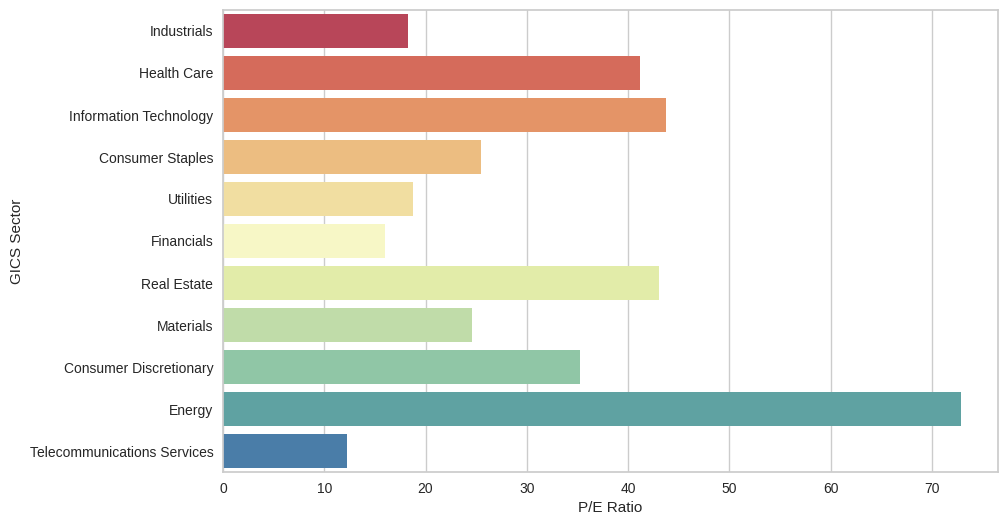

In [ ]:
'''P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings.
How does the P/E ratio vary, on average, across economic sectors?'''
#Creating a barplot for GICS Sector vs. P/E Ratio.

plt.figure(figsize = (10,6))
sns.barplot(data = df, x = "P/E Ratio", y = "GICS Sector", palette = "Spectral", ci = False)
plt.show()

The Energy Sector has by far the greatest P/E ratio of all the sectors. Conversely, the Telecommunications Services sector has the smallest P/E ratio.

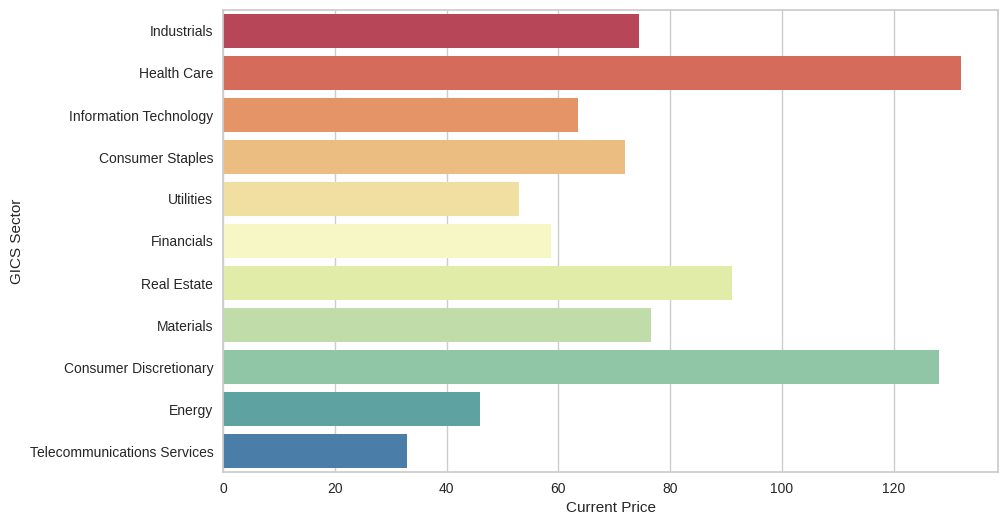

In [ ]:
#Creating a barplot for GICS Sector vs. Current Price.

plt.figure(figsize = (10,6))
sns.barplot(data = df, x = "Current Price", y = "GICS Sector", palette = "Spectral", ci = False)
plt.show()

The Health Care and Consumer Discretionary sectors have the average highest current stock prices. The Telecommunications Services sector has the lowest.

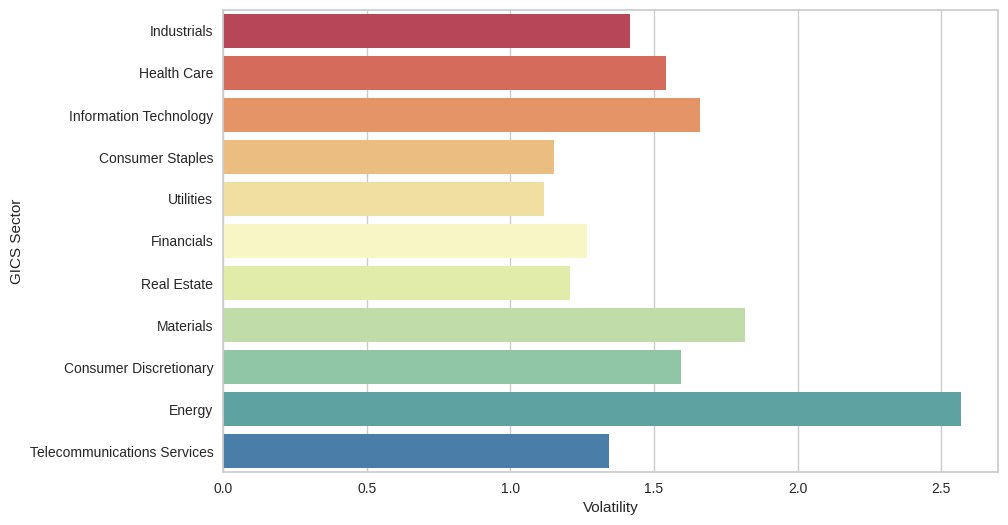

In [ ]:
#Creating a barplot for GICS Sector vs. Volatility.

plt.figure(figsize = (10,6))
sns.barplot(data = df, x = "Volatility", y = "GICS Sector", palette = "Spectral", ci = False)
plt.show()

The Energy sector is the most volatile (based on the past 13 weeks).

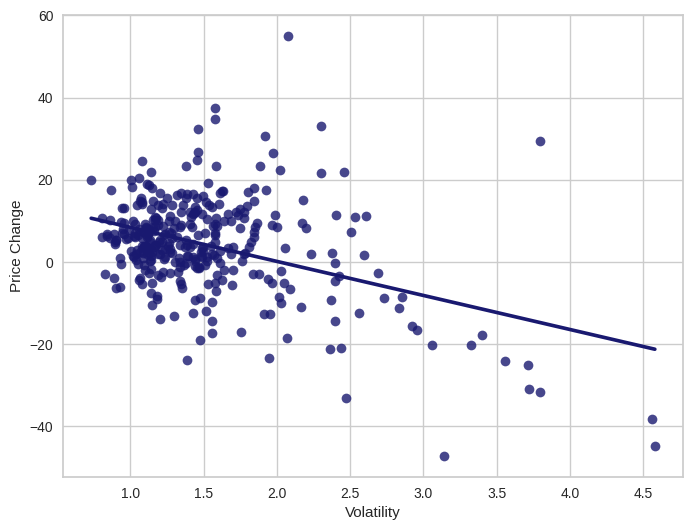

In [ ]:
#Creating a regression plot for Price Change vs. Volatility.

plt.figure(figsize = (8,6))
sns.regplot(data = df, x = "Volatility", y = "Price Change", ci = False, color = "midnightblue")
plt.show()

There appears to be a negative correlation between a stock's volatility and price change (more volatile stocks tend to decrease in price).

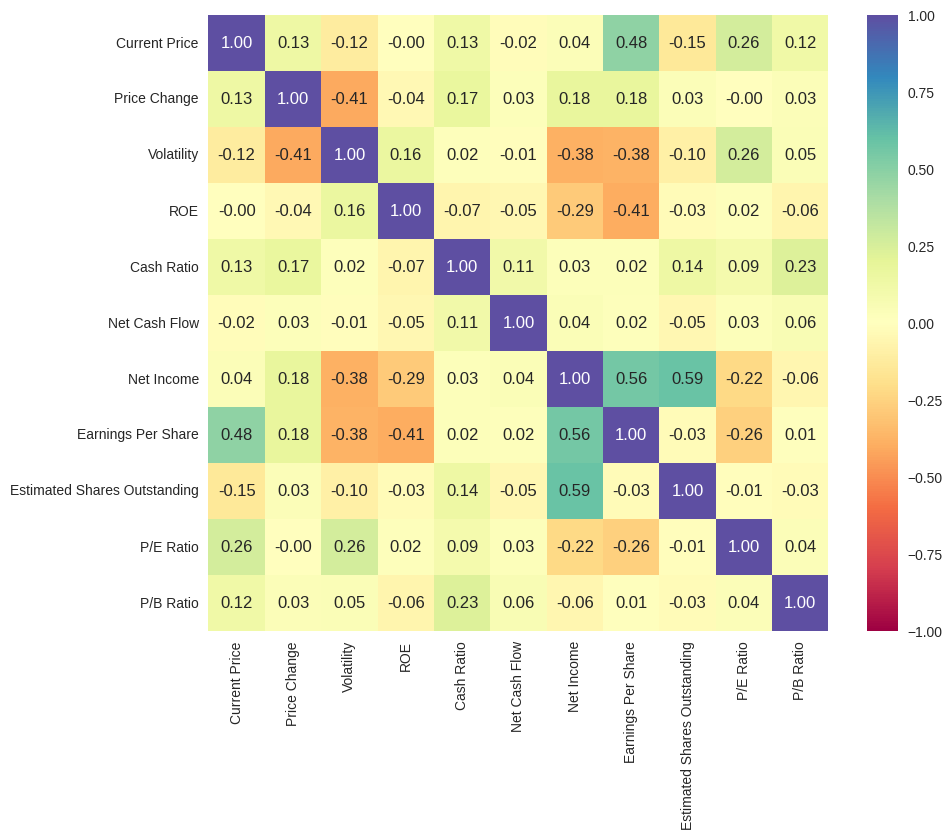

In [ ]:
# "How are the different variables correlated with each other?"
#Creating a heatmap of the numerical variables.

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")
plt.show()

Some observations:
* Net Income and ESO have the greatets positive correlation of all the variable combinations (0.59)
* Net income and EPS closely follows at 0.56
* Current Price and EPS also have a notable positive correlation (0.48)
* Volatility/Price Change and EPS/ROE tie for the greatest negative correlation (-0.41)
* Volatility/EPS and Volatility/Net Income also tie for the second greatest negative correlation (-0.38)


## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

###The data was already checked for missing and duplicate values in the overview section (it has neither).

### Outlier Check

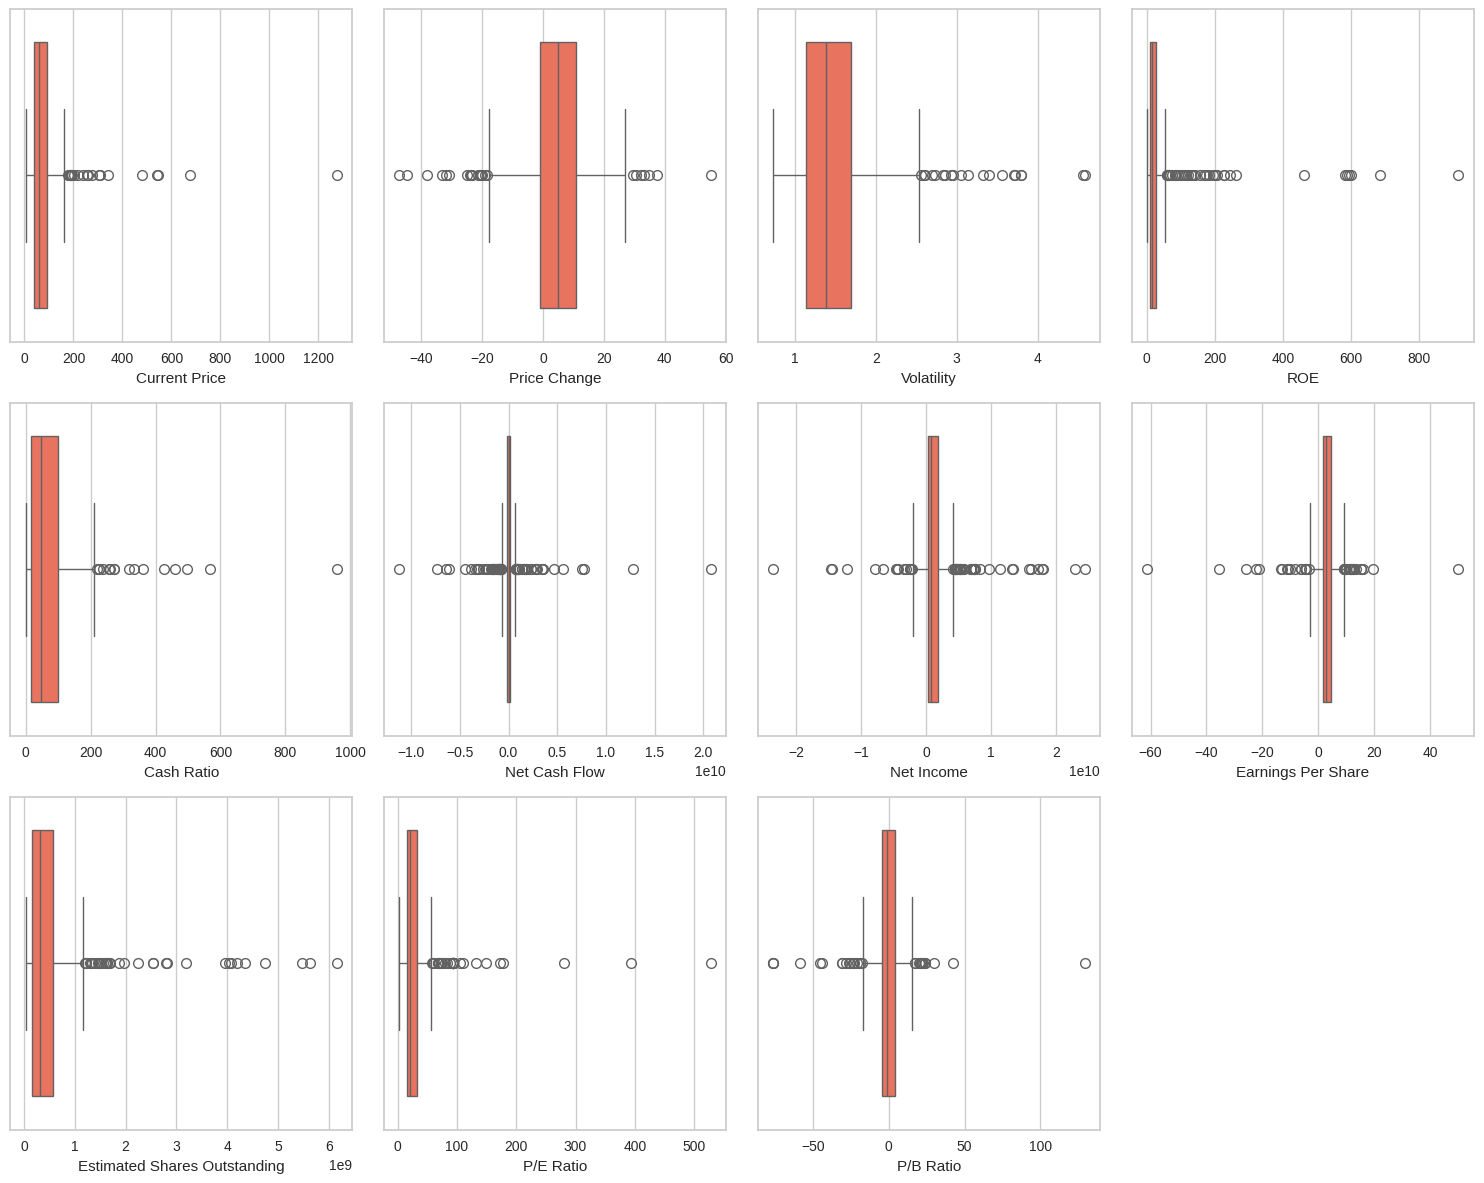

In [ ]:
#Plotting only the outliers from the numeric columns.

numCols = df.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 12))

for i, variable in enumerate(numCols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data = df, x = variable, color = "tomato")
    plt.tight_layout()

plt.show()

As noted in the univariate analysis section, these outliers are appropriate in context of the data, so they will not be treated.

### Feature Engineering

In [ ]:
#Scaling the data (necessary for clustering).

scaler = StandardScaler()
subset = df[numCols].copy()
subsetScaled = scaler.fit_transform(subset)

In [ ]:
#Creating a dataframe of the scaled data.

dfScaled = pd.DataFrame(subsetScaled, columns = subset.columns)

In [ ]:
#Checking the new data set to make sure it's scaled.

dfScaled.head(10)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
5,-0.451251,-1.342556,-0.016049,-0.307006,-0.232849,-0.125823,0.090133,0.032432,0.048977,-0.459427,0.660752
6,1.998837,0.176091,-0.692132,-0.099549,-0.498664,0.018187,-0.228206,0.932390,-0.603923,-0.035502,9.377562
7,-0.384353,-0.158797,-0.679931,-0.317379,-0.620496,0.119096,-0.218177,-0.026856,-0.393572,-0.360984,0.071614
8,-0.230744,-0.142338,-0.774192,-0.296633,-0.675874,-0.021424,0.141806,0.053714,-0.183672,-0.319668,-0.093530
9,-0.214096,-0.087667,-0.808359,-0.265515,0.320933,-0.187053,0.263986,0.471769,-0.173153,-0.506408,-0.011879


## K-means Clustering

### Elbow Method

Since K-Means Clustering requires a pre-defined K (number of clusters), we can use the Elbow Method to find the optimal number of clusters. This number will have a good balance between distortion and accuracy.

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


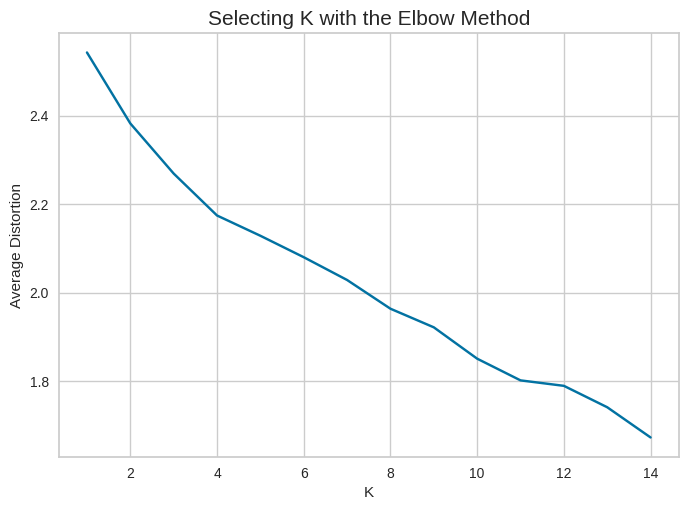

In [ ]:
#Defining range for number of clusteres to be tested.
clusters = range(1, 15)
meanDistortions = []

#Creating for-loop to build a model and fit it onto scaled data with each number of K clusters.
for k in clusters:
    model = KMeans(n_clusters = k, random_state = 1)
    model.fit(dfScaled)
    prediction = model.predict(dfScaled)
    distortion = (
        sum(np.min(cdist(dfScaled, model.cluster_centers_, "euclidean"), axis = 1))
        / dfScaled.shape[0]
    )

    #Appending the distorion of each K to empty list.
    meanDistortions.append(distortion)
    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

#Plotting line graph.
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("K")
plt.ylabel("Average Distortion")
plt.title("Selecting K with the Elbow Method", fontsize = 15)
plt.show()

This graph doesn't tell us much, since there's no distinct "elbow". However, we can use the Visualizer to help select a K.

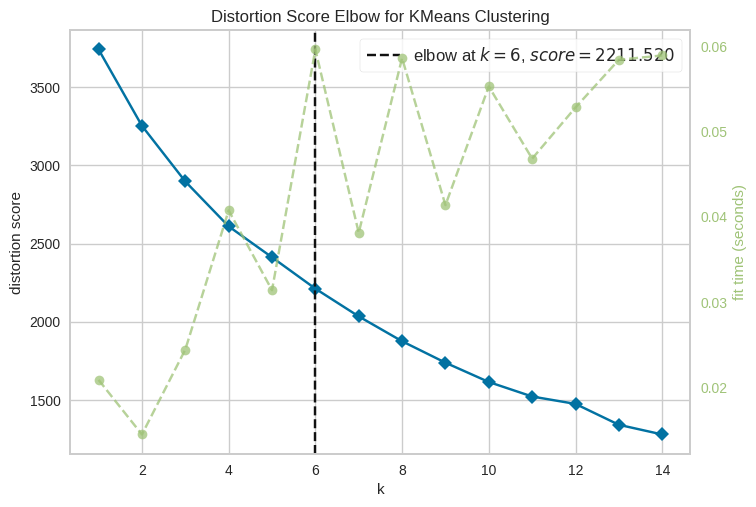

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model, k = (1,15), timings = True)
visualizer.fit(dfScaled)
visualizer.show()

The optimal K = 6, based on the Elbow Method.

### Silhouette Scores

We can also check silhouette scores. Ideally, a(i) < b(i); a random point in a cluster is closer to other points within that cluster than to points in another cluster. This means 0 < s(i) <= 1.

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


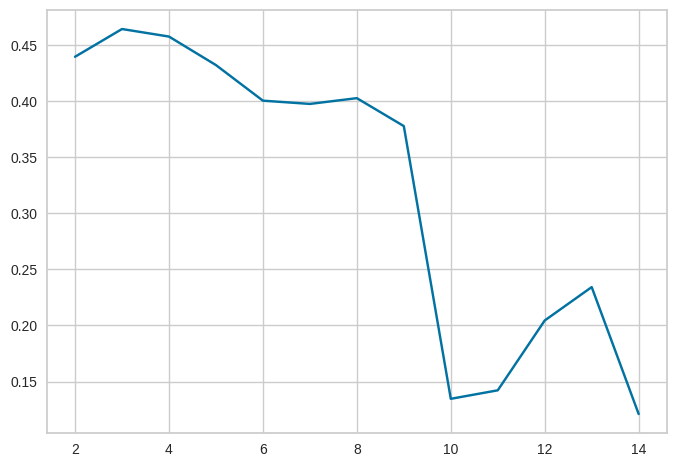

In [ ]:
#Defining range for number of clusteres to be tested.
clusterList = range(2, 15)
silhouetteScore = []

#Creating for-loop to calculate the silhouette score each number of n clusters.
for n_clusters in clusterList:
    clusterer = KMeans(n_clusters = n_clusters, random_state = 1)
    predictions = clusterer.fit_predict((dfScaled))
    score = silhouette_score(dfScaled, predictions)

    #Appending the scores to the empty list.
    silhouetteScore.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

#Plotting graph.
plt.plot(clusterList, silhouetteScore)
plt.show()

According to the graph, the best range is between 2 and 8 clusters. Let's use the Visualizer to check.

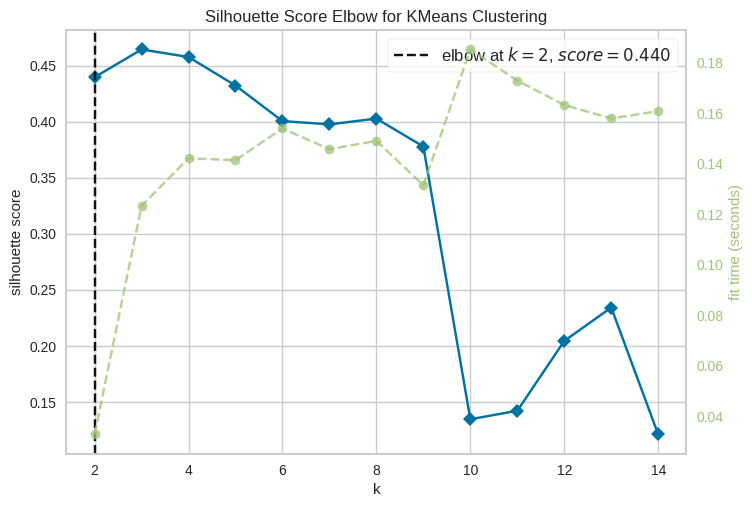

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model1 = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model1, k = (2,15), metric = "silhouette", timings = True)
visualizer.fit(dfScaled)
visualizer.show()

The optimal K = 2, accoring to the silhouette scores. This is significantly less clusters than recommended by the Elbow Method. We can check both 2 and 6 (and others) with the Silhouette Visualizer.

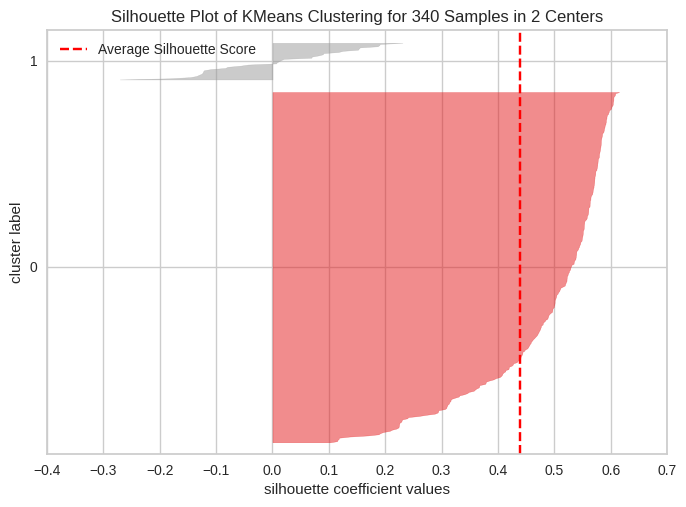

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#Vizualizing the clusters at K = 2.

visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(dfScaled)
visualizer.show()

Two does not seem like enough clusters.

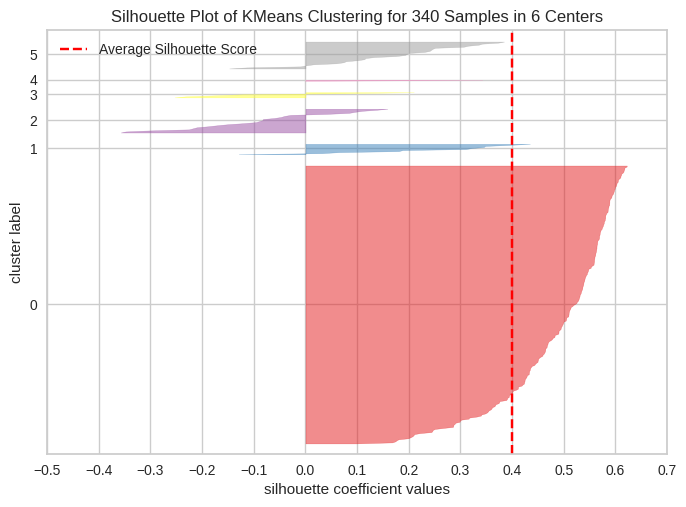

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#Vizualizing the clusters at K = 6.

visualizer = SilhouetteVisualizer(KMeans(6, random_state = 1))
visualizer.fit(dfScaled)
visualizer.show()

Clusters 3 and 4 seem very small. This seems like too many clusters.

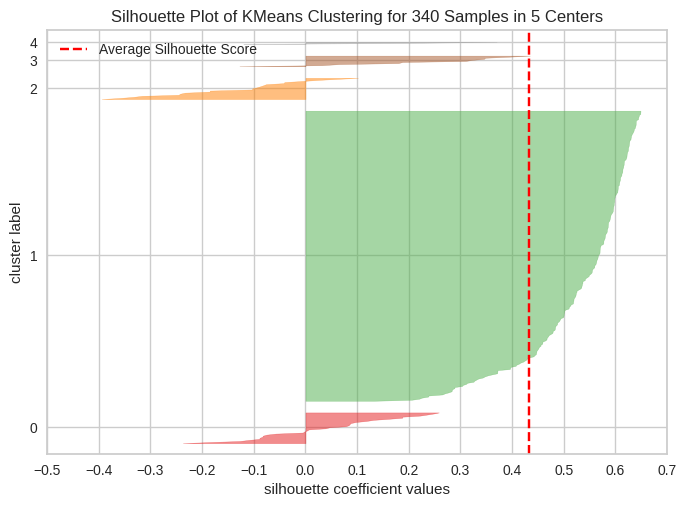

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#Vizualizing the clusters at K = 5.

visualizer = SilhouetteVisualizer(KMeans(5, random_state = 1))
visualizer.fit(dfScaled)
visualizer.show()

Cluster 4 is too small, maybe we can have one less cluster.

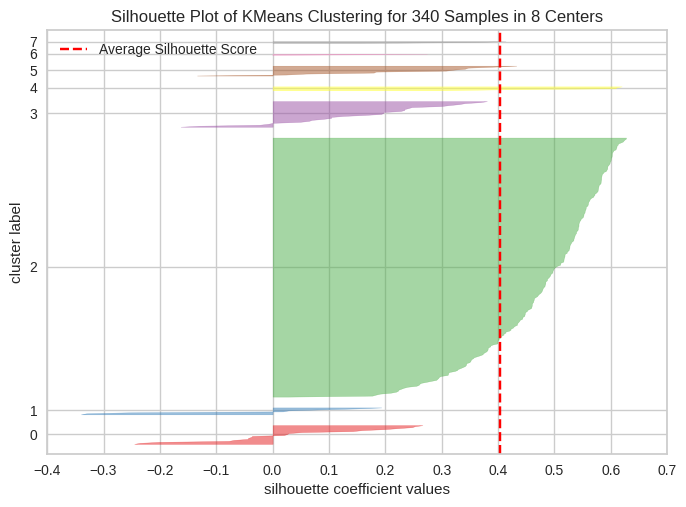

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#Vizualizing the clusters at K = 8.

visualizer = SilhouetteVisualizer(KMeans(8, random_state = 1))
visualizer.fit(dfScaled)
visualizer.show()

This is the sum of both recommended numbers (2 and 6). Clusters 6 and 7 are quite thin, and the s(i) is smaller than with other numbers.

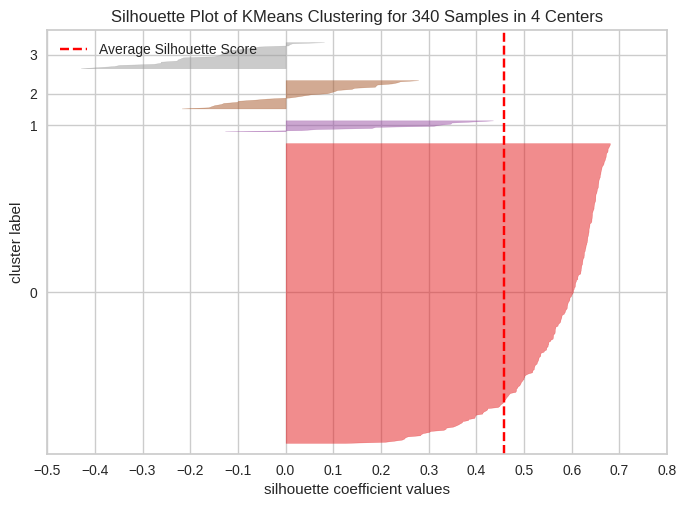

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
#Vizualizing the clusters at K = 4.

visualizer = SilhouetteVisualizer(KMeans(4, random_state = 1))
visualizer.fit(dfScaled)
visualizer.show()

This is the average of both recommended numbers (2 and 6). Though it looks like there is no way to break down the giant cluster without affecting the scores, the 4 clusters look better than with previous numbers (none are too thin, and the s(i) is not the lowest).

### Final Model

We will use K = 4 for the final model.

In [ ]:
#Building and fitting the final model onto the scaled data.

kMeans = KMeans(n_clusters= 4, random_state = 1)
kMeans.fit(dfScaled)

KMeans(n_clusters=4, random_state=1)

In [ ]:
#Copying the orignal data set.

df1 = df.copy()

In [ ]:
#Copying the scaled data set.

dfScaled1 = dfScaled.copy()

In [ ]:
#Appending the new Cluster ID column onto the data sets.

dfScaled1["Cluster ID"] = kMeans.labels_
df1["Cluster ID"] = kMeans.labels_

In [ ]:
#Checking the new column.

df1.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Cluster ID
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,3
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831,0
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585,3
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497,0
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649,0
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912,0


In [ ]:
#Checking the new column.

dfScaled1.tail(10)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Cluster ID
330,-0.425718,0.301813,-0.905299,-0.307006,0.320933,0.349310,-0.074428,0.219416,-0.346077,-0.526793,-0.433406,0
331,-0.029745,-0.035140,-0.263847,-0.317379,-0.698026,-0.497318,3.725040,0.163169,4.283396,-0.279242,-0.070857,1
332,-0.204394,1.319853,-0.877850,-0.296633,-0.111017,0.039857,-0.315982,-0.149992,-0.517038,0.031205,0.184517,0
333,-0.717310,0.450140,0.576558,-0.358870,-0.487589,-0.050701,-0.259353,-0.358260,0.653019,-0.164916,0.101984,0
334,-0.453089,0.578174,-0.608645,-0.244769,0.143723,-0.019829,-0.293412,-0.136310,-0.469068,-0.298027,0.419373,0
335,-0.486181,0.901646,0.540121,-0.255142,4.308162,-0.559673,-1.487784,-1.127481,0.429111,-0.082116,0.572194,3
336,-0.289510,-1.065766,-0.079703,1.062211,-0.476513,0.053235,-0.051186,0.029391,-0.167741,-0.337154,-0.152012,0
337,0.221913,0.439539,-0.206067,-0.400362,0.332009,0.164889,-0.342467,-0.303532,-0.460058,2.233634,-1.589390,0
338,-0.547053,-0.436811,-0.097813,-0.369243,0.320933,-0.051022,-0.301171,-0.239684,-0.377852,-0.222714,0.118680,0
339,-0.336453,1.051046,0.142671,-0.078803,-0.055639,0.111378,-0.293666,-0.318734,-0.092942,0.854902,0.246754,0


### Cluster Profiling

In [ ]:
#Grouping the original data (with the new column) by Cluster ID and averaging each group's columns. Creating a new dataframe.

clusterIDs = df1.groupby("Cluster ID").mean()

In [ ]:
#Grouping the data by Cluster ID and totaling the number of companies in each. Appending sums as a new column.

clusterIDs["ID Count"] = (df1.groupby("Cluster ID")["Security"].count().values)

In [ ]:
#Checking the new column.

clusterIDs

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,ID Count
Cluster ID,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-1.404622e+07,1.482212e+09,3.621029,4.385338e+08,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1.072273e+09,1.483309e+10,4.154545,4.298827e+09,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-1.594285e+08,-3.887458e+09,-9.473704,4.803986e+08,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1.554927e+09,1.572612e+09,6.045200,5.783163e+08,74.960824,14.402452,25


In [ ]:
#Highlighting the maximum of each column.

clusterIDs.style.highlight_max(color = "aquamarine", axis = 0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,ID Count
Cluster ID,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [ ]:
#Highlighting the minimum of each column.

clusterIDs.style.highlight_min(color = "darkorange", axis = 0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,ID Count
Cluster ID,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


In [ ]:
#Printing the names of all the companies in each cluster.

for c in df1["Cluster ID"].unique():
    print("Companies in Cluster {}:".format(c))
    print(df1[df1["Cluster ID"] == c]["Security"].unique())
    print()

Companies in Cluster 0:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Ca

In [ ]:
#Counting the number of companies in each economic sector for each cluster.

df1.groupby(["Cluster ID", "GICS Sector"])["Security"].count()

Cluster ID  GICS Sector                
0           Consumer Discretionary         33
            Consumer Staples               17
            Energy                          6
            Financials                     45
            Health Care                    29
            Industrials                    52
            Information Technology         24
            Materials                      19
            Real Estate                    26
            Telecommunications Services     2
            Utilities                      24
1           Consumer Discretionary          1
            Consumer Staples                1
            Energy                          1
            Financials                      3
            Health Care                     2
            Information Technology          1
            Telecommunications Services     2
2           Energy                         22
            Industrials                     1
            Information Technology      

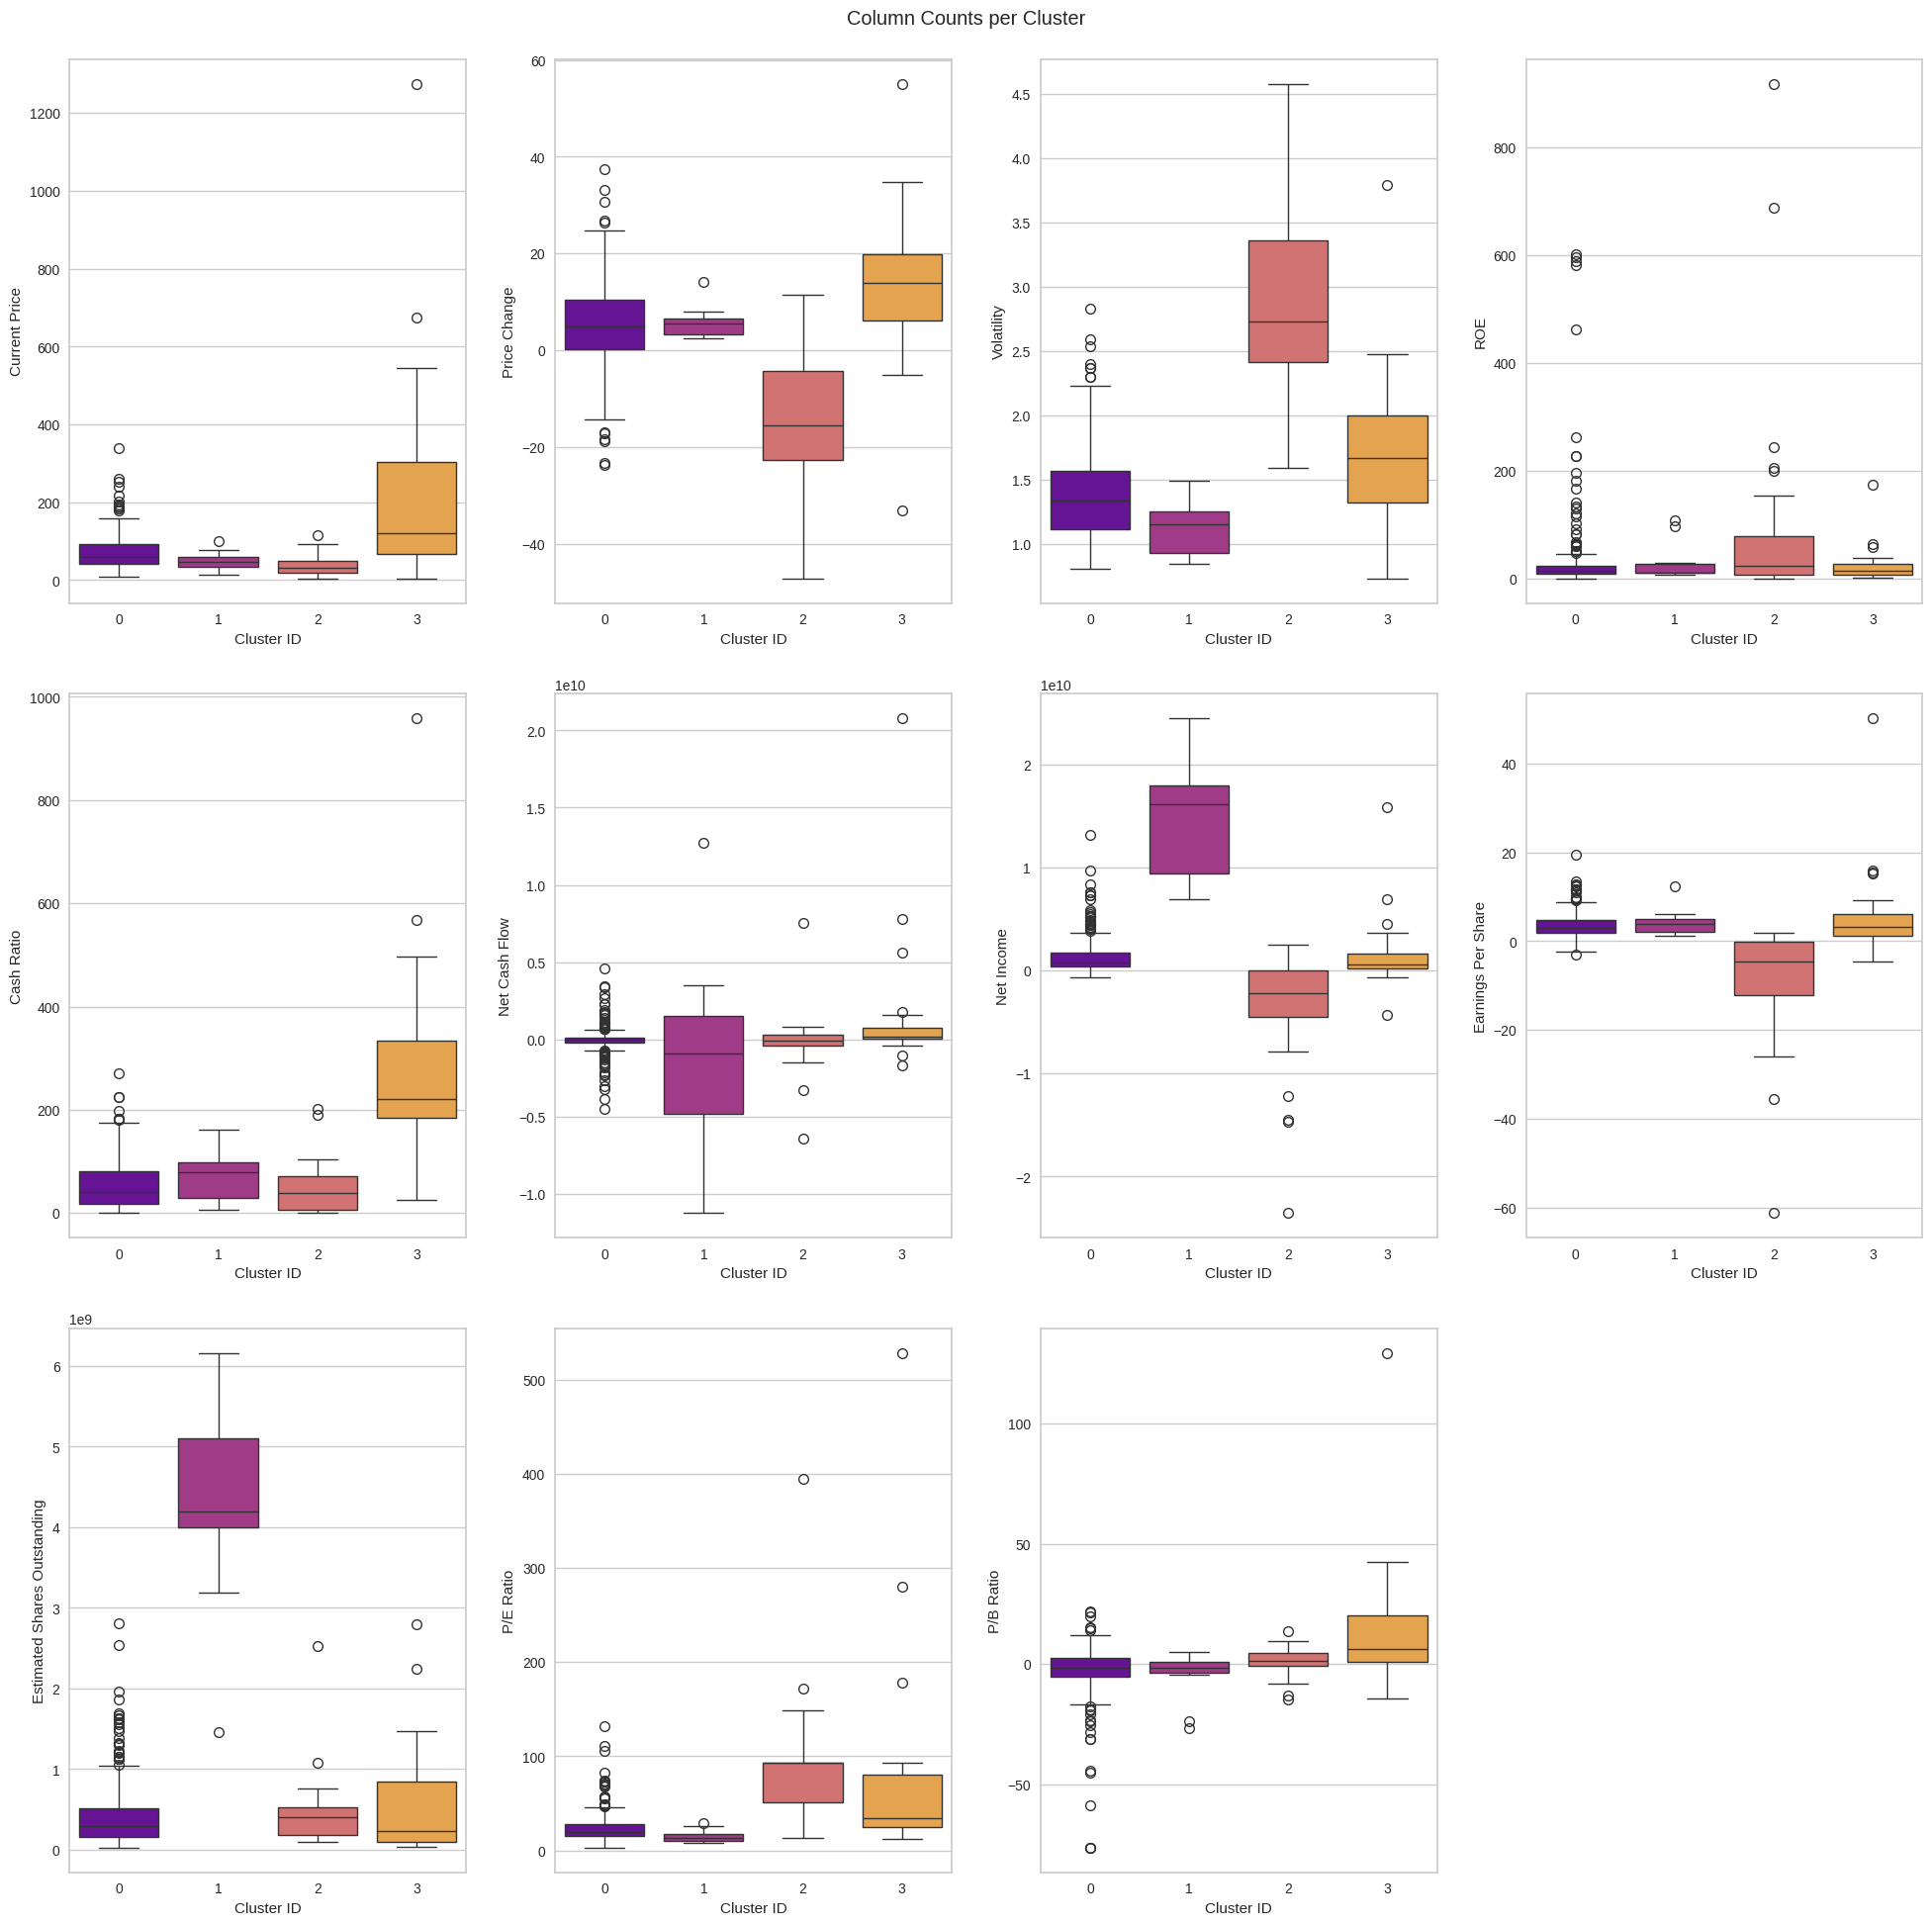

In [ ]:
#Plotting the column counts per cluster using boxplots.

plt.figure(figsize = (20,20))
plt.suptitle("Column Counts per Cluster")

for i, variable in enumerate(numCols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data = df1, x = "Cluster ID", y = variable, palette = "plasma")

plt.tight_layout(pad = 2.0)

### Observations

Cluster 0:
* Greatest ID count (277 companies)
* Largest Sector is Industrials (52 companies)
* Least number of Estimated Shares Outstanding*

Cluster 1:
* Smallest ID count (11 companies)
* Largest Sector is Financials (3 companies)
* Highest Net Income*
* Greatest number of Estimated Shares Outstanding*
* Lowest Volatility*
* Greatest negative Net Cash Flow*
* Lowest P/E and P/B Ratios*

Cluster 2:
* Largest Sector is Energy (22 companies)
* Highest Volatility*
* Greatest ROE*
* Highest P/E Ratio*
* Lowest Current Price*
* Greatest negative Price Change*
* Smallest Cash Ratio*
* Lowest Net Income*
* Lowest Earnings Per Share*

Cluster 3:
* Largest Sector is Health Care (9 companies)
* Highest Current Price*
* Greatest positive Price Change*
* Greatest Cash Ratio*
* Greatest positive Net Cash Flow*
* Highest Earnings Per Share*
* Highest P/B Ratio*
* Lowest ROE*

"*" denotes averages per column per cluster

## Hierarchical Clustering

### Cophenetic Correlation

By calculating the cophenetic correlation for various linkage methods and distance metrics, we can better decide which to use for the hierarchical clustering model.

In [ ]:
#Creating a second copy of the original scaled data.

dfScaled2 = dfScaled.copy()

In [ ]:
#Listing various distance metrics.
distanceMetrics = ["euclidean", "cityblock", "chebyshev", "mahalanobis"]

#Listing various linkage methods.
linkageMethods = ["single", "complete", "average", "weighted"]

#Creating blank variables.
highestCophCorr = 0
optDmLm = [0, 0]

#Creating for-loop to calculate the cophenetic distance for every DM and LM combination.
for dm in distanceMetrics:
    for lm in linkageMethods:
        Z = linkage(dfScaled2, metric = dm, method = lm)
        c, cophDistance = cophenet(Z, pdist(dfScaled2))
        print("Cophenetic correlation for {} distance and {} linkage is {}.".format(dm.capitalize(), lm, c))

        #Pulling highest cophenetic correlation value and optimal DM/LM pair.
        if highestCophCorr < c:
            highestCophCorr = c
            optDmLm[0] = dm
            optDmLm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Cityblock distance and single linkage is 0.9334186366528574.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7375328863205818.
Cophenetic correlation for Cityblock distance and average linkage is 0.9302145048594667.
Cophenetic correlation for Cityblock distance and weighted linkage is 0.731045513520281.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlatio

In [ ]:
#Printing the best results.

print("The highest cophenetic correlation is {}, which was obtained using {} distance and the {} linkage method.".format(highestCophCorr, optDmLm[0].capitalize(), optDmLm[1]))

The highest cophenetic correlation is 0.9422540609560814, which was obtained using Euclidean distance and the average linkage method.


The best correlation score was obtained using Euclidean distance and the average linkage method. Let's test additional linkage methods using only Euclidean distance.

In [ ]:
#Listing various linkage methods.
linkageMethods = ["single", "complete", "average", "weighted", "centroid", "ward"]

#Creating blank variables.
highestCophCorr = 0
optDmLm = ["Euclidean", 0]

#Creating for-loop to calculate the cophenetic distance for every LM.
for lm in linkageMethods:
    Z = linkage(dfScaled2, metric = "euclidean", method = lm)
    c, coph_dists = cophenet(Z, pdist(dfScaled2))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))

    #Pulling highest cophenetic correlation value.
    if highestCophCorr < c:
        highestCophCorr = c
        optDmLm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.


In [ ]:
#Printing the best results.

print("The highest cophenetic correlation is {}, which was obtained using the {} linkage method.".format(highestCophCorr, optDmLm[1]))

The highest cophenetic correlation is 0.9422540609560814, which was obtained using the average linkage method.


The optimal linkage method is still average. We can now make the dendrograms.

### Dendrograms

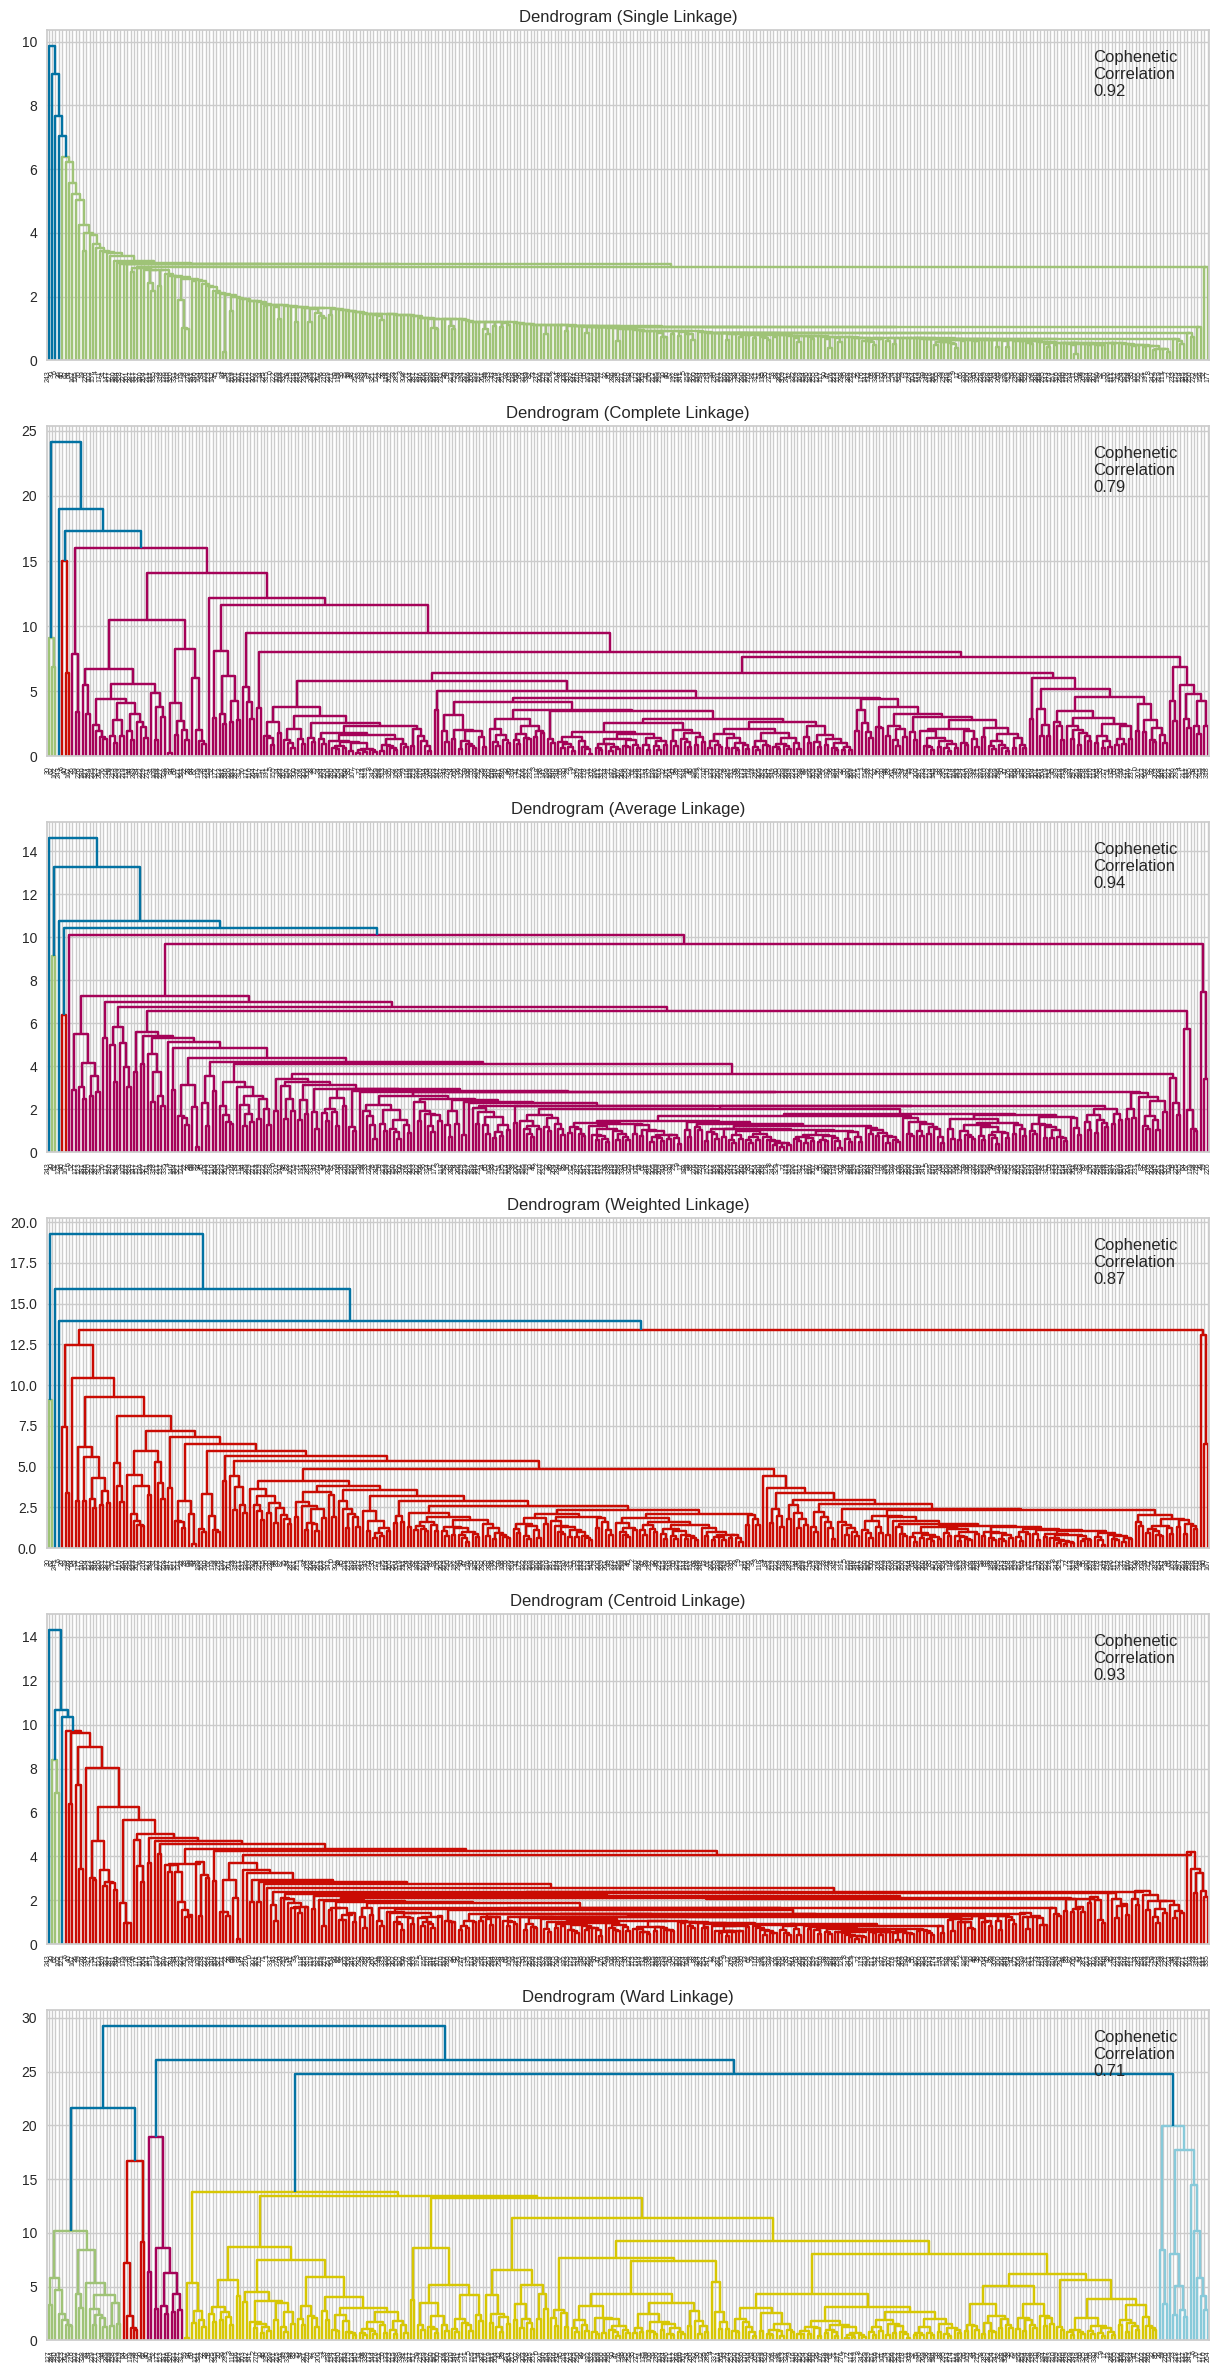

In [ ]:
#Listing various linkage methods.
linkageMethods = ["single", "complete", "average", "weighted", "centroid", "ward"]

#Creating empty list to store results.
compare = []

fig, axs = plt.subplots(len(linkageMethods), 1, figsize = (15,30))

#Enumerating through linkage methods (to save each index). Calculating the cophenetic correlation and plotting the dendrogram for each.
for i, method in enumerate(linkageMethods):
    Z = linkage(dfScaled2, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    cophCorr, cophDist = cophenet(Z, pdist(dfScaled2))
    axs[i].annotate(f"Cophenetic\nCorrelation\n{cophCorr:0.2f}", (0.90,0.80), xycoords = "axes fraction",)

    compare.append([method, cophCorr])

In [ ]:
#Printing the results.

compare

[['single', 0.9232271494002922],
 ['complete', 0.7873280186580672],
 ['average', 0.9422540609560814],
 ['weighted', 0.8693784298129404],
 ['centroid', 0.9314012446828154],
 ['ward', 0.7101180299865353]]

The results are the same as the previous. The optimal option is still Euclidean distance and the average linkage method. Based on the dendrogram, we will build the model to have 3 clusters.

### Final Model

In [ ]:
#Building and fitting the final model onto the scaled data.

hierCluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "average")
hierCluster.fit(dfScaled2)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

In [ ]:
#Copying original data frame again.

df2 = df.copy()

In [ ]:
#Appending the new Cluster ID column onto the data sets.

dfScaled2["Cluster ID"] = hierCluster.labels_
df2["Cluster ID"] = hierCluster.labels_

In [ ]:
#Checking the new column.

df2.head(10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Cluster ID
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,0
5,ADM,Archer-Daniels-Midland Co,Consumer Staples,Agricultural Products,36.680000,-12.017268,1.516493,10,49,-189000000,1849000000,2.99,6.183946e+08,12.267559,7.496831,0
6,ADS,Alliance Data Systems,Information Technology,Data Processing & Outsourced Services,276.570007,6.189286,1.116976,30,25,90885000,596541000,8.91,6.695185e+07,31.040405,129.064585,0
7,AEE,Ameren Corp,Utilities,MultiUtilities,43.230000,2.174424,1.124186,9,14,287000000,636000000,2.60,2.446154e+08,16.626923,-0.719497,0
8,AEP,American Electric Power,Utilities,Electric Utilities,58.270000,2.371753,1.068485,11,9,13900000,2052300000,3.13,4.218978e+08,18.456543,-3.022649,0
9,AFL,AFLAC Inc,Financials,Life & Health Insurance,59.900002,3.027181,1.048295,14,99,-308000000,2533000000,5.88,4.307823e+08,10.187075,-1.883912,0


In [ ]:
#Checking the new column.

dfScaled2.sample(10)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,Cluster ID
338,-0.547053,-0.436811,-0.097813,-0.369243,0.320933,-0.051022,-0.301171,-0.239684,-0.377852,-0.222714,0.118680,0
97,0.235599,-0.439301,-0.318233,-0.255142,-0.354681,-0.004753,-0.336926,0.289345,-0.640489,-0.234970,-0.728448,0
65,0.668646,0.384048,0.105634,-0.234396,-0.000261,0.253389,0.152405,0.819895,-0.379734,-0.331996,-0.508164,0
296,-0.281198,1.599108,0.102793,-0.275887,-0.565118,0.100058,-0.069741,0.076517,-0.447299,-0.192904,-0.018803,0
145,-0.492207,0.531172,-0.005412,-0.327752,-0.443286,-0.381033,-0.301799,-0.248805,-0.364348,-0.089304,0.398251,0
221,-0.708935,-0.184330,1.192787,-0.151413,0.320933,0.049119,-0.126421,-0.017735,-0.239421,-0.639247,-0.011666,0
245,0.194643,0.166323,-1.219471,0.056044,-0.022412,1.495478,1.005913,0.141886,1.056723,-0.128263,-0.248989,0
27,-0.216548,-0.144126,-0.076256,-0.213650,-0.764480,-0.029245,-0.267334,0.175330,-0.549852,-0.393644,-0.448279,0
54,0.367556,0.760355,-0.983419,-0.307006,0.320933,0.547704,0.340492,0.901986,-0.297956,-0.433502,-1.129173,0
206,-0.019532,0.667547,0.325636,0.657670,0.730731,0.179142,-0.213729,0.076517,-0.447299,-0.192904,0.588971,0


### Cluster Profiling

In [ ]:
#Grouping the original data (with the new column) by Cluster ID and averaging each group's columns. Creating a new dataframe.

clusterIDs = df2.groupby("Cluster ID").mean()

In [ ]:
#Grouping the data by Cluster ID and totaling the number of companies in each. Appending sums as a new column.

clusterIDs["ID Count"] = (df2.groupby("Cluster ID")["Security"].count().values)

In [ ]:
#Checking the new column.

clusterIDs

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,ID Count
Cluster ID,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.79822,6.866225e+07,1.613509e+09,2.900905,5.789304e+08,32.466828,-1.739711,337
1,1274.949951,3.190527,1.268340,29.000000,184.00000,-1.671386e+09,2.551360e+09,50.090000,5.093552e+07,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.00000,-1.292500e+09,-1.910650e+10,-41.815000,5.195740e+08,60.748608,1.565141,2


In [ ]:
#Highlighting the maximum of each column.

clusterIDs.style.highlight_max(color = "aquamarine", axis = 0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,ID Count
Cluster ID,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.798220,68662246.290801,1613508620.178041,2.900905,578930419.447478,32.466828,-1.739711,337
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2


In [ ]:
#Highlighting the minimum of each column.

clusterIDs.style.highlight_min(color = "darkorange", axis = 0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,ID Count
Cluster ID,,,,,,,,,,,,
0,77.653642,4.184271,1.515129,35.103858,69.798220,68662246.290801,1613508620.178041,2.900905,578930419.447478,32.466828,-1.739711,337
1,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2


In [ ]:
#Printing the names of all the companies in each cluster.

for c in df2["Cluster ID"].unique():
    print("Companies in Cluster {}:".format(c))
    print(df2[df2["Cluster ID"] == c]["Security"].unique())
    print()

Companies in Cluster 0:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC Inc.'
 'The Bank of New York

In [ ]:
#Counting the number of companies in each economic sector for each cluster.

df2.groupby(["Cluster ID", "GICS Sector"])["Security"].count()

Cluster ID  GICS Sector                
0           Consumer Discretionary         39
            Consumer Staples               19
            Energy                         28
            Financials                     49
            Health Care                    40
            Industrials                    53
            Information Technology         33
            Materials                      20
            Real Estate                    27
            Telecommunications Services     5
            Utilities                      24
1           Consumer Discretionary          1
2           Energy                          2
Name: Security, dtype: int64

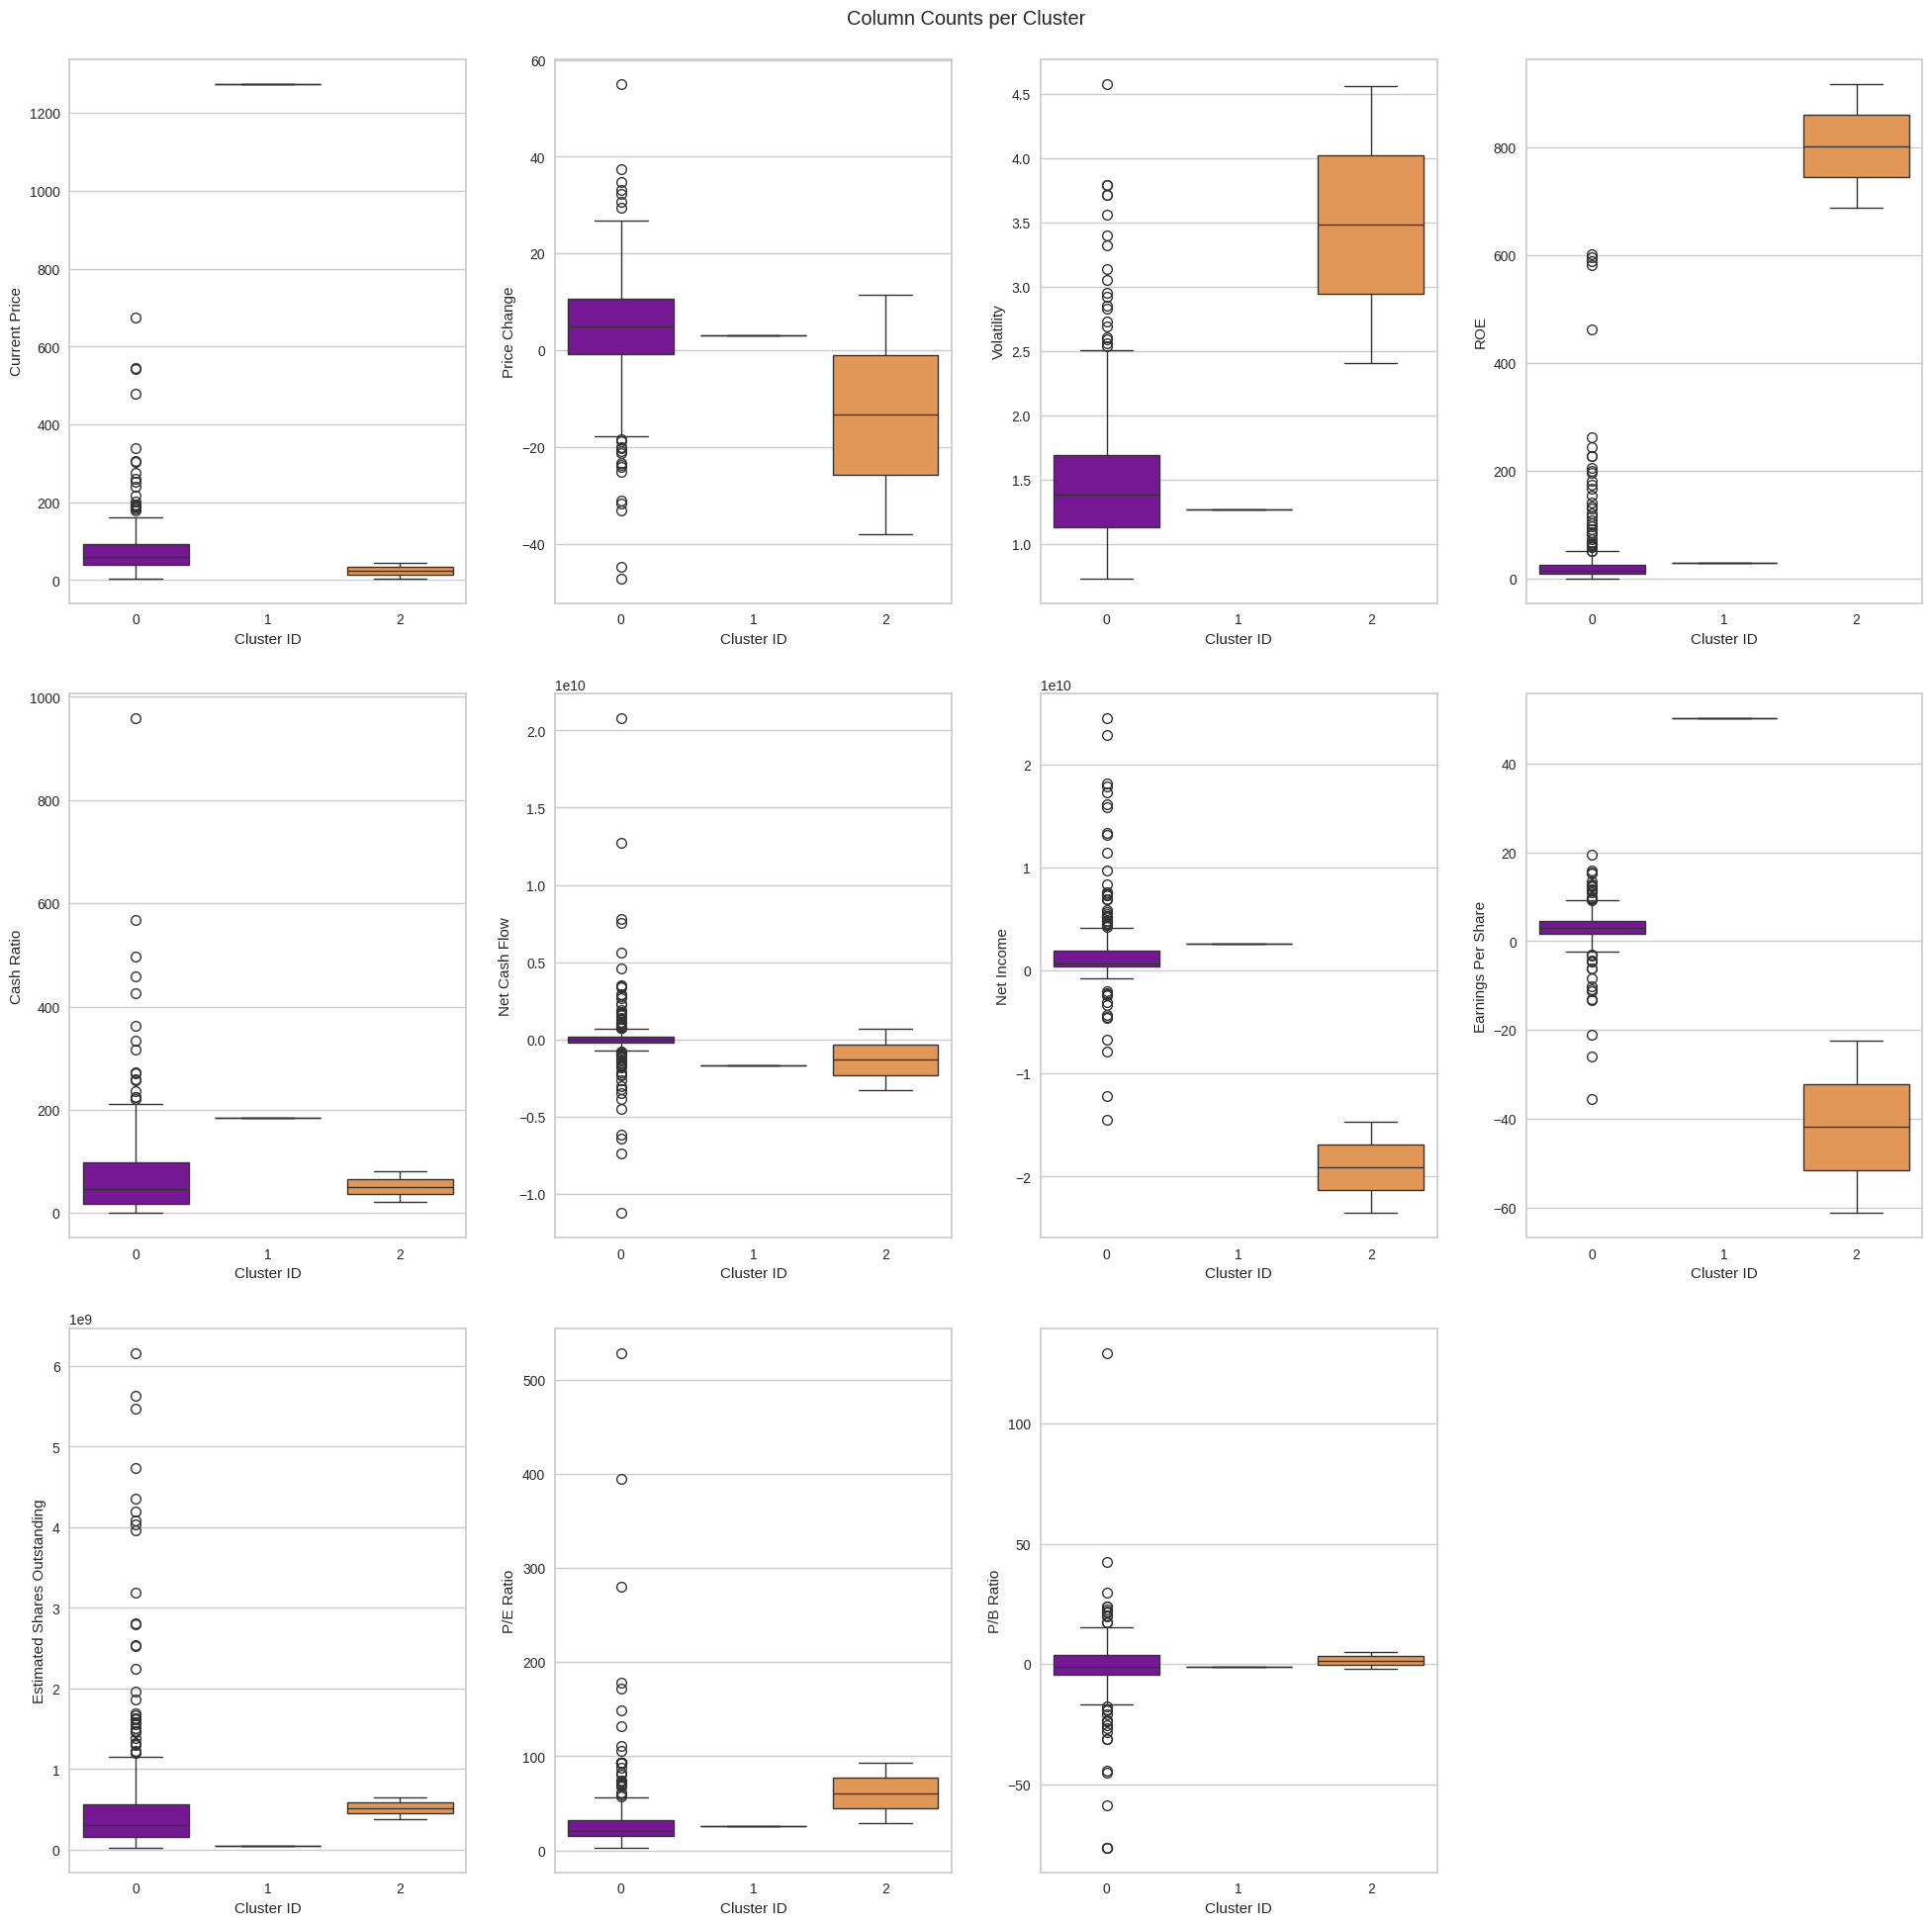

In [ ]:
#Plotting the column counts per cluster using boxplots.

plt.figure(figsize = (20,20))
plt.suptitle("Column Counts per Cluster")

for i, variable in enumerate(numCols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data = df2, x = "Cluster ID", y = variable, palette = "plasma")

plt.tight_layout(pad = 2.0)

### Observations

Cluster 0
* Has almost all the data points (337)
* Largest Sector is Industrials (53 companies)
* Greatest postitive Price Change*
* Greatest positive Net Cash Flow*
* Greatest number of Estimated Shares Outstanding*


Cluster 1
* Only 1 company (Priceline.com Inc.)
* Consumer Discretionary sector

Cluster 2
* Only 2 companies (Apache Corporation, Chesapeake Energy)
* Energy sector

Clusters 1 and 2 have the majority of high and low points, but it is unfair to compare these to the giant Cluster 0, which averages 337 companies instead of 2 maximum.

"*" denotes averages per column per cluster

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

Given that the data set was small, neither clusteting technique took an excessive amount of time; both were pretty quick. The K-Means model was perhaps a bit faster.

Neither technique was able to produce super distinct and equal-sized clusters; both produced one giant cluster encompassing the majoiry of the data, with a few smaller ones. However, the K-Means model produced smaller clusters of closer size to each other (27, 25, 11) in additon to the largest one (277), while the hierarchical technique made an enormous cluster with almost all the data points (337) and two smaller ones with less than 5 companies total (1, 2).

The K-Means model produced 4 clusters, and the hierarchical model produced 3.

In both models, the Industrials economic sector was the largest in Cluster 0. Similarly, the largest sector in Cluster 2 was Energy (for both models as well).

Generally, the K-Means Clustering technique appears to be a better fit for this specific data set.

## Actionable Insights and Recommendations


For this particular data set, neither the K-Means not the hierarchical clustering techniques were able to create super distinct clusters. This means that a large majority of companies were determined to be 'similar' to each other by multiple metrics, meaning it could be difficult to diversify one's portfolio. However, some useful informstion could be gathered from the entire analysis:

**Cluster Analysis**

We ran two separate clustering models (K-Means and hierarchical agglomerative), and came up with some important points:
* Industrials was the sector with the most data points in the biggest cluster of both models. This means that one should not invest into too many companies within this sector, as they are not diverse enough from each other to assure financial security.
* *Apache Corporation* and *Chesapeake Energy* are two energy sector companies that both showed up in separate clusters for both models, even forming their own small cluster in the hierarchical model. This indicates dissimilarity to other companies. Investing in either one could help diversify one's portfolio.
* *Priceline.com Inc* was in smaller clusters in both models, which also indicates dissimilarity, and could help diversify one's portfolio as well.

**Exploratory Data Analysis**

Some useful insights were also gathered from the bivariate analysis:
* Though the energy sector (as explained above) can help diversify a portfolio, it is also the most volatile sector of all. According to the analysis, there is a negative correlation between volatility and price change, meaning that more volatile sectors are more likely to decrease in price.
  * The energy sector does currently have the greatest price decrease, based on the past 13 weeks.
  * However, it also has the current highest P/E ratio.
* The health care sector has the greatest price increase.
* The telecommunications sector has the lowest P/E ratio.

It is recommended to tread carefully when investing in the energy sector, though it does help diversify a portfolio.

It is best to invest in different companies within sectors that have low volatility, as they are less likely to suffer from stock price decreases.

Do not invest into many different companies within the industrial sector; diversify instead.

Though the Utilities sector has the lowest current price, it is also the least volatile. Could be a good addition to a portfolio (might add some stability).



